In [2]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from scipy.stats import chi2_contingency
from scipy import stats

In [5]:
train = pd.read_csv('/content/drive/MyDrive/machine learning/train.csv')
train = train.drop(train.columns[0], axis=1)
test=pd.read_csv('/content/drive/MyDrive/machine learning/test.csv')
test_id=pd.DataFrame(test.iloc[:, 0])
test = test.drop(test.columns[0], axis=1)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train.head()

,id,owner_1_score,RATE_owner_1,CAP_AMOUNT_owner_1,PERCENT_OWN_owner_1,owner_2_score,RATE_owner_2,CAP_AMOUNT_owner_2,PERCENT_OWN_owner_2,owner_3_score,...,INPUT_VALUE_ID_FOR_avg_net_deposits,RATE_ID_FOR_avg_net_deposits,INPUT_VALUE_ID_FOR_industry_type,RATE_ID_FOR_industry_type,INPUT_VALUE_owner_4,RATE_owner_4,CAP_AMOUNT_owner_4,PERCENT_OWN_owner_4,deal_application_thread_id,completion_status
0,4813,606.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,preferred,NaN,606.0,A,150000.0,100.0,4642,Paid off with renewal
1,1406,703.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,NaN,...,107027.25,NaN,preferred,NaN,703.0,A,150000.0,100.0,1362,Paid in full
2,7415,692.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,preferred,NaN,692.0,A,150000.0,100.0,6485,Default
3,6759,684.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,preferred,NaN,684.0,A,150000.0,100.0,6035,Paid via discounted payoff
4,5867,625.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,preferred,NaN,625.0,A,150000.0,100.0,5299,Paid in full


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   id                                        1537 non-null   int64  
 1   owner_1_score                             1516 non-null   float64
 2   RATE_owner_1                              1510 non-null   object 
 3   CAP_AMOUNT_owner_1                        1506 non-null   float64
 4   PERCENT_OWN_owner_1                       1524 non-null   float64
 5   owner_2_score                             185 non-null    float64
 6   RATE_owner_2                              185 non-null    object 
 7   CAP_AMOUNT_owner_2                        174 non-null    float64
 8   PERCENT_OWN_owner_2                       224 non-null    float64
 9   owner_3_score                             7 non-null      float64
 10  RATE_owner_3                        

In [ ]:
train.shape

(1537, 55)

In [ ]:
train.describe()

,id,owner_1_score,CAP_AMOUNT_owner_1,PERCENT_OWN_owner_1,owner_2_score,CAP_AMOUNT_owner_2,PERCENT_OWN_owner_2,owner_3_score,CAP_AMOUNT_owner_3,PERCENT_OWN_owner_3,...,INPUT_VALUE_ID_FOR_tax_lien_percent,INPUT_VALUE_ID_FOR_tax_lien_count,INPUT_VALUE_ID_FOR_current_position,INPUT_VALUE_ID_FOR_avg_net_deposits,RATE_ID_FOR_avg_net_deposits,RATE_ID_FOR_industry_type,INPUT_VALUE_owner_4,CAP_AMOUNT_owner_4,PERCENT_OWN_owner_4,deal_application_thread_id
count,1537.000000,1516.000000,1506.000000,1524.000000,185.000000,174.000000,224.000000,7.000000,7.000000,33.000000,...,1537.000000,1528.000000,1525.000000,1.531000e+03,0.0,0.0,1510.000000,1457.000000,1491.000000,1537.000000
mean,4497.816526,639.666227,117031.872510,92.826509,1118.902703,117011.494253,35.324107,623.857143,85714.285714,7.572727,...,0.047681,0.014398,0.714754,9.107680e+04,NaN,NaN,656.448344,116420.727522,97.400469,3943.005205
std,2553.947155,436.564984,47147.062423,39.239430,1988.694684,53867.530571,18.474337,224.808384,80178.372574,16.709134,...,1.388539,0.176711,0.779881,1.732702e+05,NaN,NaN,570.443661,47681.543573,37.275931,2172.407533
min,33.000000,0.000000,0.000000,0.000000,432.000000,0.000000,0.000000,376.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,0.000000,0.000000,0.000000,88.000000
25%,2609.000000,573.000000,100000.000000,100.000000,582.000000,100000.000000,20.000000,387.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,568.000000,100000.000000,100.000000,2234.000000
50%,4468.000000,620.000000,150000.000000,100.000000,647.000000,150000.000000,49.000000,804.000000,150000.000000,0.000000,...,0.000000,0.000000,1.000000,4.735876e+04,NaN,NaN,621.000000,150000.000000,100.000000,4171.000000
75%,6324.000000,664.000000,150000.000000,100.000000,680.000000,150000.000000,50.000000,804.000000,150000.000000,0.000000,...,0.000000,0.000000,1.000000,1.051457e+05,NaN,NaN,665.000000,150000.000000,100.000000,5428.000000
max,11271.000000,9002.000000,150000.000000,1000.000000,9002.000000,150000.000000,64.000000,804.000000,150000.000000,50.000000,...,53.968000,3.000000,4.000000,2.291481e+06,NaN,NaN,9002.000000,150000.000000,1000.000000,9062.000000


In [ ]:
print(train.isnull().sum())


id                                             0
owner_1_score                                 21
RATE_owner_1                                  27
CAP_AMOUNT_owner_1                            31
PERCENT_OWN_owner_1                           13
owner_2_score                               1352
RATE_owner_2                                1352
CAP_AMOUNT_owner_2                          1363
PERCENT_OWN_owner_2                         1313
owner_3_score                               1530
RATE_owner_3                                1530
CAP_AMOUNT_owner_3                          1530
PERCENT_OWN_owner_3                         1504
years_in_business                             12
RATE_ID_FOR_years_in_business                 12
fsr                                          417
RATE_ID_FOR_fsr                             1522
location                                      10
RATE_ID_FOR_location                          64
funded_last_30                                 0
RATE_ID_FOR_funded_l

In [ ]:
print(train.dtypes)

id                                            int64
owner_1_score                               float64
RATE_owner_1                                 object
CAP_AMOUNT_owner_1                          float64
PERCENT_OWN_owner_1                         float64
owner_2_score                               float64
RATE_owner_2                                 object
CAP_AMOUNT_owner_2                          float64
PERCENT_OWN_owner_2                         float64
owner_3_score                               float64
RATE_owner_3                                 object
CAP_AMOUNT_owner_3                          float64
PERCENT_OWN_owner_3                         float64
years_in_business                           float64
RATE_ID_FOR_years_in_business                object
fsr                                         float64
RATE_ID_FOR_fsr                              object
location                                     object
RATE_ID_FOR_location                         object
funded_last_

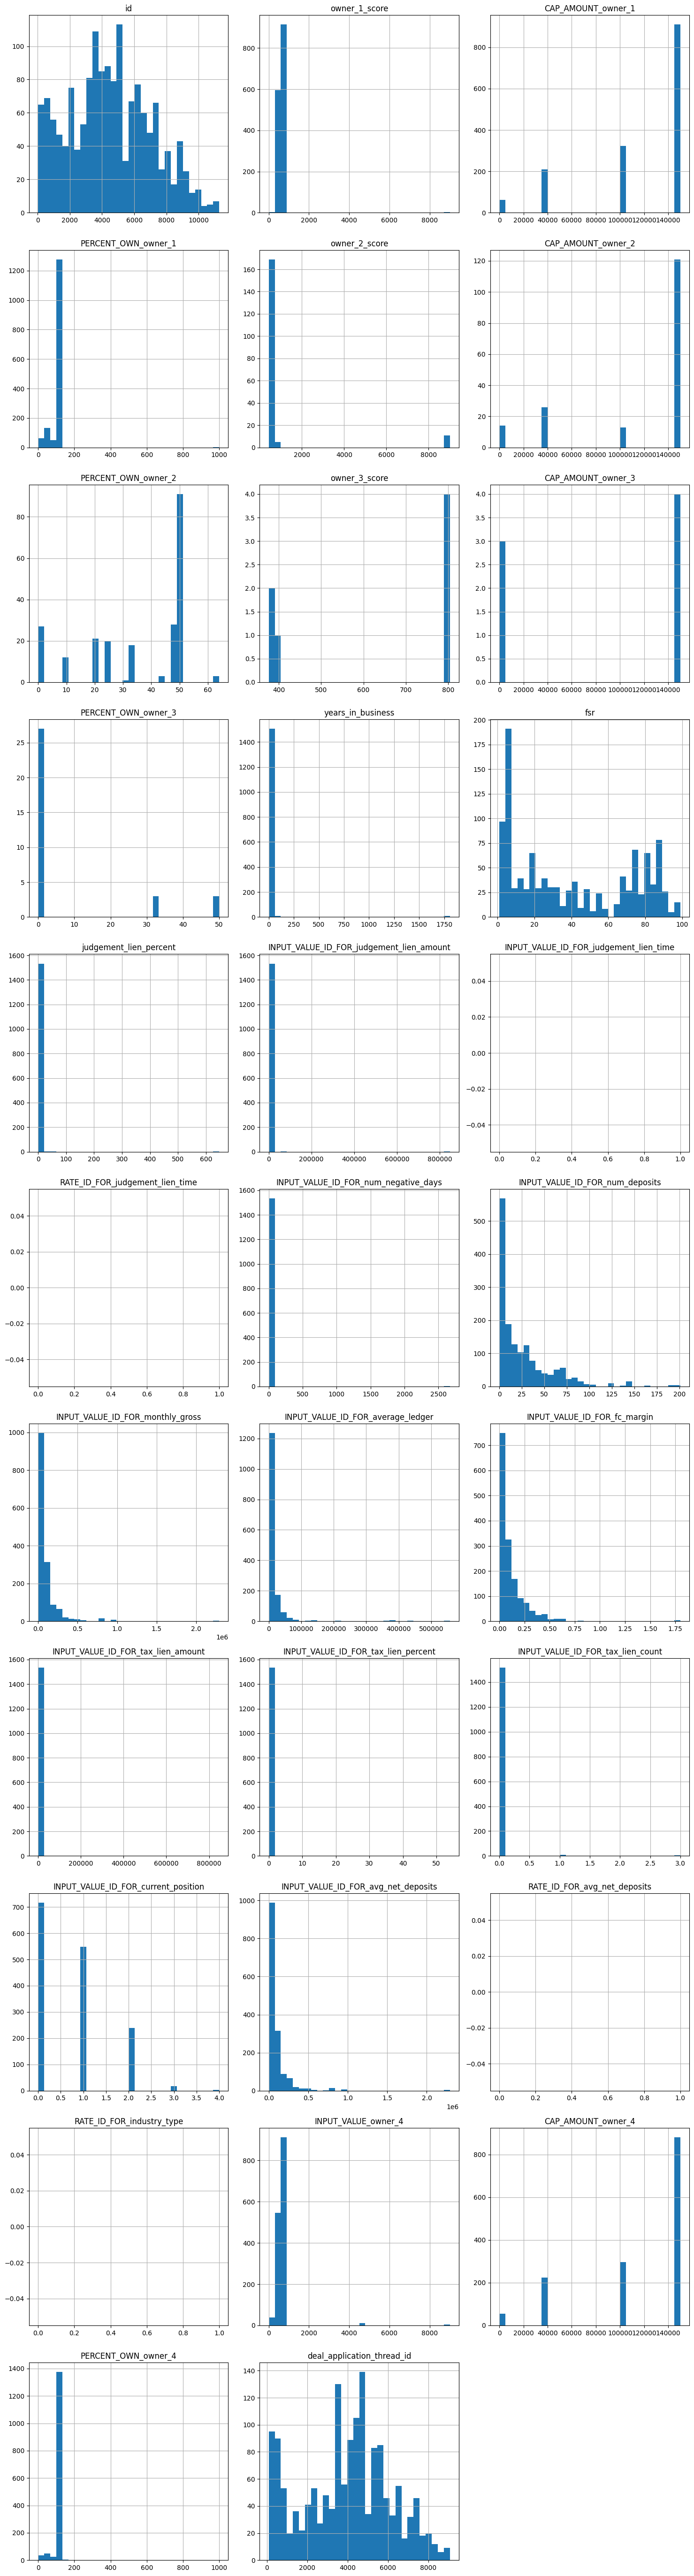

In [ ]:
numeric_columns = train.select_dtypes(include=['number']).columns

n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

for i, col in enumerate(numeric_columns):
    row = i // n_cols
    col_pos = i % n_cols
    ax = axes[row, col_pos]
    train[col].hist(bins=30, ax=ax)
    ax.set_title(col)

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


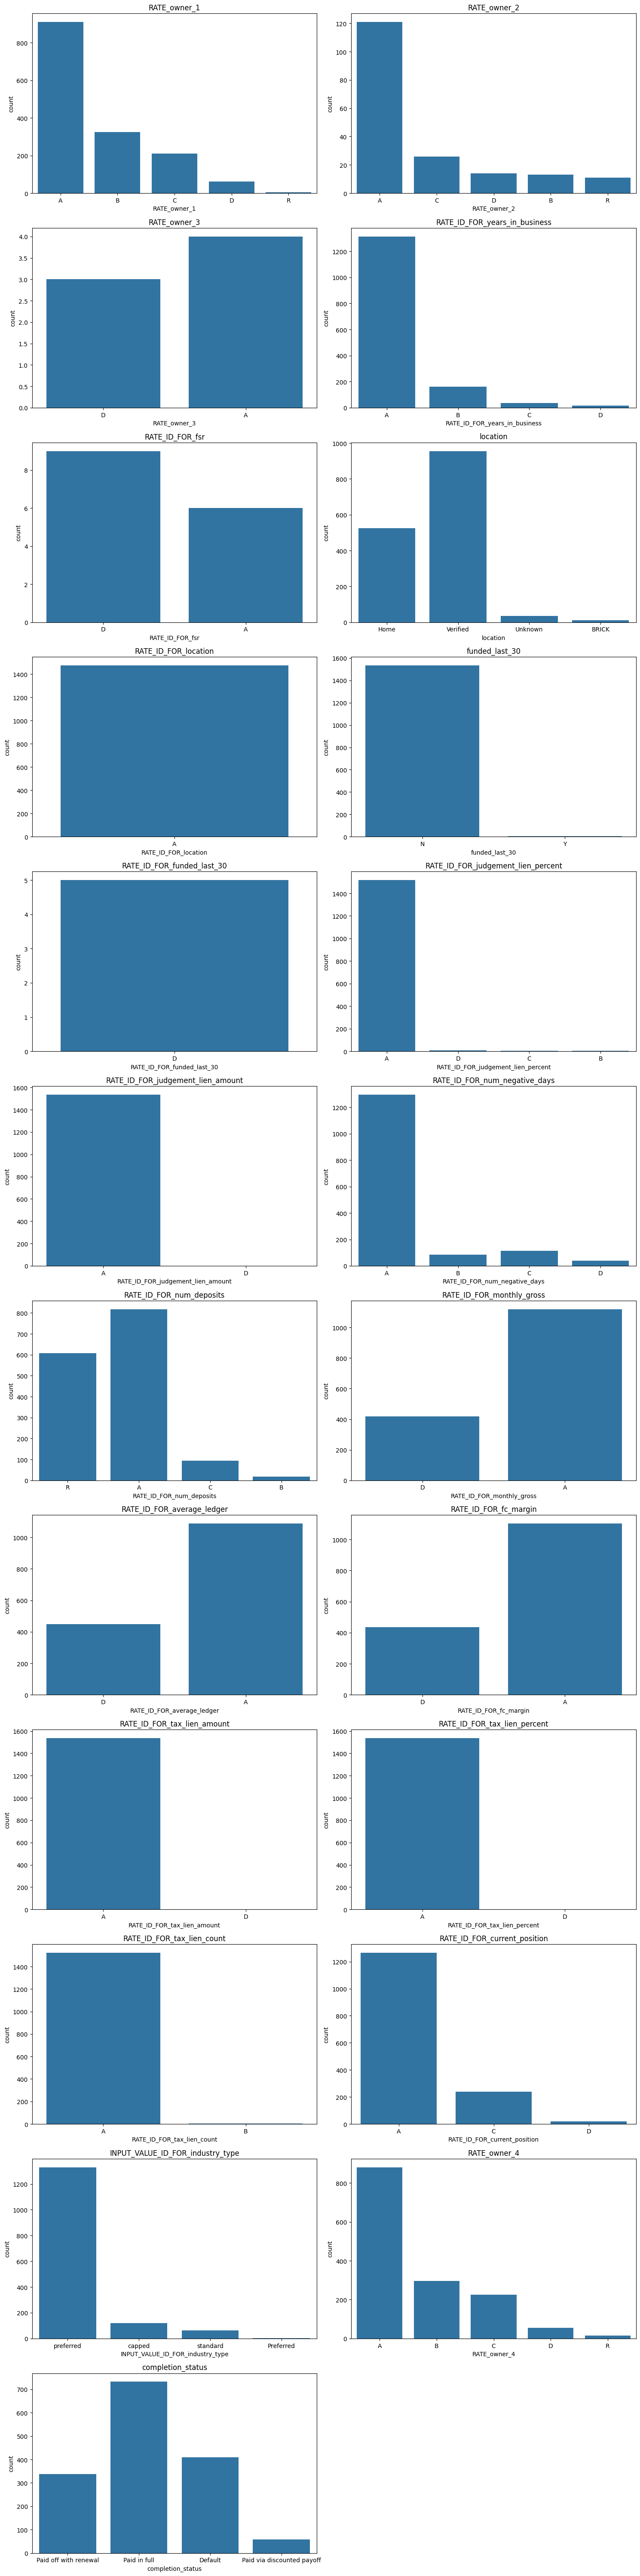

In [ ]:
categorical_columns = train.select_dtypes(include=['object']).columns

n_cols = 2
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

for i, col in enumerate(categorical_columns):
    row = i // n_cols
    col_pos = i % n_cols
    ax = axes[row, col_pos]
    sns.countplot(data=train, x=col, ax=ax)
    ax.set_title(col)

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


In [ ]:
print(train.duplicated().sum())

421


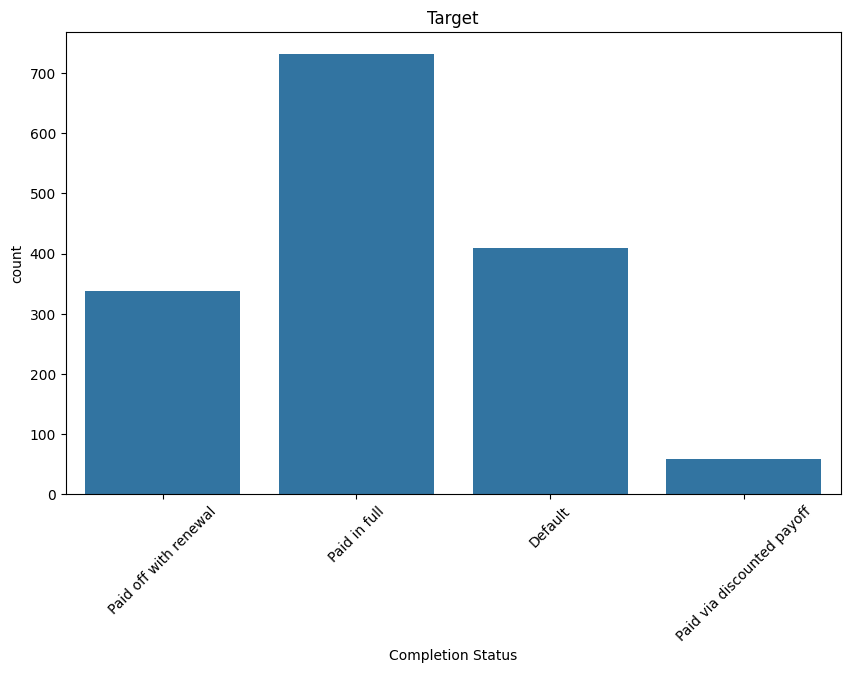

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=train['completion_status'])
plt.title('Target')
plt.xlabel('Completion Status')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(train.isnull().sum())

id                                             0
owner_1_score                                 21
RATE_owner_1                                  27
CAP_AMOUNT_owner_1                            31
PERCENT_OWN_owner_1                           13
owner_2_score                               1352
RATE_owner_2                                1352
CAP_AMOUNT_owner_2                          1363
PERCENT_OWN_owner_2                         1313
owner_3_score                               1530
RATE_owner_3                                1530
CAP_AMOUNT_owner_3                          1530
PERCENT_OWN_owner_3                         1504
years_in_business                             12
RATE_ID_FOR_years_in_business                 12
fsr                                          417
RATE_ID_FOR_fsr                             1522
location                                      10
RATE_ID_FOR_location                          64
funded_last_30                                 0
RATE_ID_FOR_funded_l

In [6]:
test_id.head()
print(test.isnull().sum())

id                                            0
owner_1_score                                 3
RATE_owner_1                                  3
CAP_AMOUNT_owner_1                            4
PERCENT_OWN_owner_1                           4
owner_2_score                               244
RATE_owner_2                                244
CAP_AMOUNT_owner_2                          245
PERCENT_OWN_owner_2                         238
owner_3_score                               270
RATE_owner_3                                270
CAP_AMOUNT_owner_3                          270
PERCENT_OWN_owner_3                         264
years_in_business                             4
RATE_ID_FOR_years_in_business                 4
fsr                                          78
RATE_ID_FOR_fsr                             269
location                                      1
RATE_ID_FOR_location                         10
funded_last_30                                0
RATE_ID_FOR_funded_last_30              

In [ ]:
print(train.isnull().sum())
print(test.isnull().sum())

id                                             0
owner_1_score                                 21
RATE_owner_1                                  27
CAP_AMOUNT_owner_1                            31
PERCENT_OWN_owner_1                           13
owner_2_score                               1352
RATE_owner_2                                1352
CAP_AMOUNT_owner_2                          1363
PERCENT_OWN_owner_2                         1313
owner_3_score                               1530
RATE_owner_3                                1530
CAP_AMOUNT_owner_3                          1530
PERCENT_OWN_owner_3                         1504
years_in_business                             12
RATE_ID_FOR_years_in_business                 12
fsr                                          417
RATE_ID_FOR_fsr                             1522
location                                      10
RATE_ID_FOR_location                          64
funded_last_30                                 0
RATE_ID_FOR_funded_l

In [7]:
missing_threshold = 0.65

missing_percentages = train.isnull().mean()

columns_to_drop = missing_percentages[missing_percentages > missing_threshold].index

columns_to_drop = columns_to_drop.union(['id'])

print("Columns to drop:", columns_to_drop)

train = train.drop(columns_to_drop, axis=1)
test = test.drop(columns_to_drop, axis=1)

Columns to drop: Index(['CAP_AMOUNT_owner_2', 'CAP_AMOUNT_owner_3',
       'INPUT_VALUE_ID_FOR_judgement_lien_time', 'PERCENT_OWN_owner_2',
       'PERCENT_OWN_owner_3', 'RATE_ID_FOR_avg_net_deposits',
       'RATE_ID_FOR_fsr', 'RATE_ID_FOR_funded_last_30',
       'RATE_ID_FOR_industry_type', 'RATE_ID_FOR_judgement_lien_time',
       'RATE_owner_2', 'RATE_owner_3', 'id', 'owner_2_score', 'owner_3_score'],
      dtype='object')


In [ ]:
test.head()

,owner_1_score,RATE_owner_1,CAP_AMOUNT_owner_1,PERCENT_OWN_owner_1,years_in_business,RATE_ID_FOR_years_in_business,fsr,location,RATE_ID_FOR_location,funded_last_30,...,RATE_ID_FOR_tax_lien_count,INPUT_VALUE_ID_FOR_current_position,RATE_ID_FOR_current_position,INPUT_VALUE_ID_FOR_avg_net_deposits,INPUT_VALUE_ID_FOR_industry_type,INPUT_VALUE_owner_4,RATE_owner_4,CAP_AMOUNT_owner_4,PERCENT_OWN_owner_4,deal_application_thread_id
0,NaN,NaN,NaN,100.0,14.24,A,NaN,Verified,NaN,N,...,A,0.0,A,79410.25667,preferred,0.0,NaN,NaN,0.0,287
1,620.0,B,100000.0,100.0,2.15,A,29.0,Home,A,N,...,A,0.0,A,86020.50000,preferred,620.0,B,100000.0,100.0,7460
2,707.0,A,150000.0,100.0,25.42,A,87.0,Verified,A,N,...,A,3.0,D,47680.83000,preferred,707.0,A,150000.0,100.0,7541
3,561.0,C,35000.0,100.0,1.73,B,1.0,Verified,A,N,...,A,2.0,C,262169.83330,preferred,561.0,C,35000.0,100.0,7256
4,541.0,C,35000.0,100.0,2.91,A,54.0,Verified,A,N,...,A,0.0,A,0.00000,preferred,541.0,C,35000.0,100.0,3324


In [8]:
train = train.drop_duplicates()

In [ ]:
print(train.isnull().sum())

owner_1_score                                18
RATE_owner_1                                 23
CAP_AMOUNT_owner_1                           26
PERCENT_OWN_owner_1                          13
years_in_business                            12
RATE_ID_FOR_years_in_business                12
fsr                                         286
location                                      7
RATE_ID_FOR_location                         45
funded_last_30                                0
judgement_lien_percent                        0
RATE_ID_FOR_judgement_lien_percent            0
INPUT_VALUE_ID_FOR_judgement_lien_amount      0
RATE_ID_FOR_judgement_lien_amount             0
INPUT_VALUE_ID_FOR_num_negative_days          0
RATE_ID_FOR_num_negative_days                 2
INPUT_VALUE_ID_FOR_num_deposits               0
RATE_ID_FOR_num_deposits                      0
INPUT_VALUE_ID_FOR_monthly_gross              0
RATE_ID_FOR_monthly_gross                     0
INPUT_VALUE_ID_FOR_average_ledger       

In [9]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Separate the numerical and categorical columns for train
numerical_cols_train = train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols_train = train.select_dtypes(include=['object']).columns

# Separate the numerical and categorical columns for test
numerical_cols_test = test.select_dtypes(include=['float64', 'int64']).columns
categorical_cols_test = test.select_dtypes(include=['object']).columns

# Initialize SimpleImputer for numerical and categorical columns
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values for numerical columns in train
train[numerical_cols_train] = numerical_imputer.fit_transform(train[numerical_cols_train])

# Impute missing valuzes for categorical columns in train
train[categorical_cols_train] = categorical_imputer.fit_transform(train[categorical_cols_train])

# Impute missing values for numerical columns in test
test[numerical_cols_test] = numerical_imputer.fit_transform(test[numerical_cols_test])

# Impute missing values for categorical columns in test
test[categorical_cols_test] = categorical_imputer.fit_transform(test[categorical_cols_test])


# Display the imputed DataFrame
print("Imputed DataFrame:")
print(train)
test.head()
test.shape
print(train.isnull().sum())

Imputed DataFrame:
      owner_1_score RATE_owner_1  CAP_AMOUNT_owner_1  PERCENT_OWN_owner_1  \
0             606.0            A            150000.0           100.000000   
1             703.0            A            150000.0           100.000000   
2             692.0            A            150000.0           100.000000   
3             684.0            A            150000.0           100.000000   
4             625.0            A            150000.0           100.000000   
...             ...          ...                 ...                  ...   
1524          504.0            C             35000.0           100.000000   
1525          595.0            B            100000.0           100.000000   
1530          493.0            D                 0.0           100.000000   
1533          640.0            A            150000.0            92.871245   
1535          500.0            C             35000.0             0.000000   

      years_in_business RATE_ID_FOR_years_in_business   

In [ ]:
print(train.isnull().sum())

owner_1_score                               0
RATE_owner_1                                0
CAP_AMOUNT_owner_1                          0
PERCENT_OWN_owner_1                         0
years_in_business                           0
RATE_ID_FOR_years_in_business               0
fsr                                         0
location                                    0
RATE_ID_FOR_location                        0
funded_last_30                              0
judgement_lien_percent                      0
RATE_ID_FOR_judgement_lien_percent          0
INPUT_VALUE_ID_FOR_judgement_lien_amount    0
RATE_ID_FOR_judgement_lien_amount           0
INPUT_VALUE_ID_FOR_num_negative_days        0
RATE_ID_FOR_num_negative_days               0
INPUT_VALUE_ID_FOR_num_deposits             0
RATE_ID_FOR_num_deposits                    0
INPUT_VALUE_ID_FOR_monthly_gross            0
RATE_ID_FOR_monthly_gross                   0
INPUT_VALUE_ID_FOR_average_ledger           0
RATE_ID_FOR_average_ledger        

In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize a dictionary to store the label encoders for each categorical column
label_encoders = {}

categorical_columns = []

# Encoding categorical columns in the train dataset
for column in train.columns:
    if train[column].dtype == object:
        label_encoders[column] = LabelEncoder()
        label_encoders[column].fit(train[column])
        train[column] = label_encoders[column].transform(train[column])
        categorical_columns.append(column)


# Encoding categorical columns in the test dataset
for column in test.columns:
    if test[column].dtype == object:
        if column in label_encoders:
            test[column] = label_encoders[column].transform(test[column])
        else:
            label_encoders[column] = LabelEncoder()
            label_encoders[column].fit(test[column])
            test[column] = label_encoders[column].transform(test[column])
        categorical_columns.append(column)


print("Categorical columns:", categorical_columns)

# Display the mapping of encoded values to original categories
for column, encoder in label_encoders.items():
    print(f"Mappings for column '{column}':")
    for class_index, class_label in enumerate(encoder.classes_):
        print(f"{class_index} -> {class_label}")

Categorical columns: ['RATE_owner_1', 'RATE_ID_FOR_years_in_business', 'location', 'RATE_ID_FOR_location', 'funded_last_30', 'RATE_ID_FOR_judgement_lien_percent', 'RATE_ID_FOR_judgement_lien_amount', 'RATE_ID_FOR_num_negative_days', 'RATE_ID_FOR_num_deposits', 'RATE_ID_FOR_monthly_gross', 'RATE_ID_FOR_average_ledger', 'RATE_ID_FOR_fc_margin', 'RATE_ID_FOR_tax_lien_amount', 'RATE_ID_FOR_tax_lien_percent', 'RATE_ID_FOR_tax_lien_count', 'RATE_ID_FOR_current_position', 'INPUT_VALUE_ID_FOR_industry_type', 'RATE_owner_4', 'completion_status', 'RATE_owner_1', 'RATE_ID_FOR_years_in_business', 'location', 'RATE_ID_FOR_location', 'funded_last_30', 'RATE_ID_FOR_judgement_lien_percent', 'RATE_ID_FOR_judgement_lien_amount', 'RATE_ID_FOR_num_negative_days', 'RATE_ID_FOR_num_deposits', 'RATE_ID_FOR_monthly_gross', 'RATE_ID_FOR_average_ledger', 'RATE_ID_FOR_fc_margin', 'RATE_ID_FOR_tax_lien_amount', 'RATE_ID_FOR_tax_lien_percent', 'RATE_ID_FOR_tax_lien_count', 'RATE_ID_FOR_current_position', 'INPUT_VA

In [ ]:
train.head()

,owner_1_score,RATE_owner_1,CAP_AMOUNT_owner_1,PERCENT_OWN_owner_1,years_in_business,RATE_ID_FOR_years_in_business,fsr,location,RATE_ID_FOR_location,funded_last_30,...,INPUT_VALUE_ID_FOR_current_position,RATE_ID_FOR_current_position,INPUT_VALUE_ID_FOR_avg_net_deposits,INPUT_VALUE_ID_FOR_industry_type,INPUT_VALUE_owner_4,RATE_owner_4,CAP_AMOUNT_owner_4,PERCENT_OWN_owner_4,deal_application_thread_id,completion_status
0,606.0,0,150000.0,100.0,2.07,0,39.461434,1,0,0,...,0.0,0,0.00,2,606.0,0,150000.0,100.0,4642.0,2
1,703.0,0,150000.0,100.0,26.57,0,73.000000,3,0,0,...,1.0,0,107027.25,2,703.0,0,150000.0,100.0,1362.0,1
2,692.0,0,150000.0,100.0,42.10,0,19.000000,1,0,0,...,0.0,0,0.00,2,692.0,0,150000.0,100.0,6485.0,0
3,684.0,0,150000.0,100.0,5.53,0,39.461434,1,0,0,...,0.0,0,0.00,2,684.0,0,150000.0,100.0,6035.0,3
4,625.0,0,150000.0,100.0,1.65,1,39.461434,1,0,0,...,0.0,0,0.00,2,625.0,0,150000.0,100.0,5299.0,1


In [ ]:
train.head()
test.head()
test_id.head()

,Unnamed: 0
0,55
1,1915
2,1127
3,1930
4,455


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming 'train' is your training dataset and 'test' is your test dataset
# Assuming both datasets have a column 'target' as the target variable
X_train = train.drop(columns=['completion_status'])
y_train = train['completion_status']

X_test = test

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SelectKBest for feature selection
k = 28  # Adjust the number of features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# To see the selected features
selected_features = selector.get_support(indices=True)
print("Selected features:", X_train.columns[selected_features])

# Converting selected features back to DataFrame (optional)
X_train_selected_df = pd.DataFrame(X_train_selected, columns=X_train.columns[selected_features])
X_test_selected_df = pd.DataFrame(X_test_selected, columns=X_test.columns[selected_features])

print(X_train_selected_df.isnull().sum())
print(X_test_selected_df.isnull().sum())


Selected features: Index(['owner_1_score', 'RATE_owner_1', 'CAP_AMOUNT_owner_1',
       'PERCENT_OWN_owner_1', 'years_in_business',
       'RATE_ID_FOR_years_in_business', 'fsr', 'funded_last_30',
       'RATE_ID_FOR_judgement_lien_percent',
       'INPUT_VALUE_ID_FOR_num_negative_days', 'RATE_ID_FOR_num_negative_days',
       'INPUT_VALUE_ID_FOR_num_deposits', 'RATE_ID_FOR_num_deposits',
       'INPUT_VALUE_ID_FOR_monthly_gross', 'INPUT_VALUE_ID_FOR_average_ledger',
       'RATE_ID_FOR_average_ledger', 'INPUT_VALUE_ID_FOR_fc_margin',
       'INPUT_VALUE_ID_FOR_tax_lien_amount',
       'INPUT_VALUE_ID_FOR_tax_lien_count', 'RATE_ID_FOR_tax_lien_count',
       'INPUT_VALUE_ID_FOR_current_position', 'RATE_ID_FOR_current_position',
       'INPUT_VALUE_ID_FOR_avg_net_deposits', 'INPUT_VALUE_owner_4',
       'RATE_owner_4', 'CAP_AMOUNT_owner_4', 'PERCENT_OWN_owner_4',
       'deal_application_thread_id'],
      dtype='object')
owner_1_score                           0
RATE_owner_1           

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [12]:
print(test.isnull().sum())
X_test_selected_df['id'] = test_id['Unnamed: 0']
print(test.isnull().sum())

owner_1_score                               0
RATE_owner_1                                0
CAP_AMOUNT_owner_1                          0
PERCENT_OWN_owner_1                         0
years_in_business                           0
RATE_ID_FOR_years_in_business               0
fsr                                         0
location                                    0
RATE_ID_FOR_location                        0
funded_last_30                              0
judgement_lien_percent                      0
RATE_ID_FOR_judgement_lien_percent          0
INPUT_VALUE_ID_FOR_judgement_lien_amount    0
RATE_ID_FOR_judgement_lien_amount           0
INPUT_VALUE_ID_FOR_num_negative_days        0
RATE_ID_FOR_num_negative_days               0
INPUT_VALUE_ID_FOR_num_deposits             0
RATE_ID_FOR_num_deposits                    0
INPUT_VALUE_ID_FOR_monthly_gross            0
RATE_ID_FOR_monthly_gross                   0
INPUT_VALUE_ID_FOR_average_ledger           0
RATE_ID_FOR_average_ledger        

In [ ]:
X_test_selected_df.head()

,owner_1_score,RATE_owner_1,CAP_AMOUNT_owner_1,PERCENT_OWN_owner_1,years_in_business,RATE_ID_FOR_years_in_business,fsr,funded_last_30,RATE_ID_FOR_judgement_lien_percent,INPUT_VALUE_ID_FOR_num_negative_days,...,RATE_ID_FOR_tax_lien_count,INPUT_VALUE_ID_FOR_current_position,RATE_ID_FOR_current_position,INPUT_VALUE_ID_FOR_avg_net_deposits,INPUT_VALUE_owner_4,RATE_owner_4,CAP_AMOUNT_owner_4,PERCENT_OWN_owner_4,deal_application_thread_id,id
0,0.013701,-0.697254,-0.009120,0.202824,-0.032231,-0.351416,-0.161080,-0.05418,-0.112453,-0.049297,...,-0.070014,-0.910478,-0.422594,-0.064715,-1.192134,-0.686396,-0.019878,-2.836942,-1.486149,55
1,-0.049185,0.431791,-0.358420,0.202824,-0.128413,-0.351416,-0.387052,-0.05418,-0.112453,-0.049297,...,-0.070014,-0.910478,-0.422594,-0.024063,-0.039337,0.416356,-0.348599,0.114603,1.586102,1915
2,0.140440,-0.697254,0.712979,0.202824,0.056711,-0.351416,1.758831,-0.05418,-0.112453,-0.046464,...,-0.070014,2.977888,4.444362,-0.259846,0.122426,-0.686396,0.728969,0.114603,1.620795,1127
3,-0.177781,1.560836,-1.751238,0.202824,-0.131755,1.627710,-1.422995,-0.05418,-0.112453,-0.040798,...,-0.070014,1.681766,2.010884,1.059225,-0.149039,1.519109,-1.749437,0.114603,1.498727,1930
4,-0.221373,1.560836,-1.751238,0.202824,-0.122367,-0.351416,0.537897,-0.05418,-0.112453,-0.049297,...,-0.070014,-0.910478,-0.422594,-0.553075,-0.186226,1.519109,-1.749437,0.114603,-0.185379,455


In [13]:
target_label_encoder = LabelEncoder()

# Fit the LabelEncoder with the original target values
original_target_values = train['completion_status'].copy()
target_label_encoder.fit(original_target_values)

X = X_train_selected_df
y = y_train

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Training Score: 0.497907949790795
Test Score: 0.5
              precision    recall  f1-score   support

           0       0.44      0.13      0.21        82
           1       0.50      0.95      0.65       145
           2       0.83      0.07      0.14        67
           3       0.00      0.00      0.00        14

    accuracy                           0.50       308
   macro avg       0.44      0.29      0.25       308
weighted avg       0.53      0.50      0.39       308

Accuracy: 0.5
Precision: 0.5329597418225577
Recall: 0.5
F1 Score: 0.39244161850208364
Sensitivity: 0.29012433626652273
Specificity: 0.29012433626652273
Confusion Matrix:
[[ 11  70   1   0]
 [  7 138   0   0]
 [  4  58   5   0]
 [  3  11   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

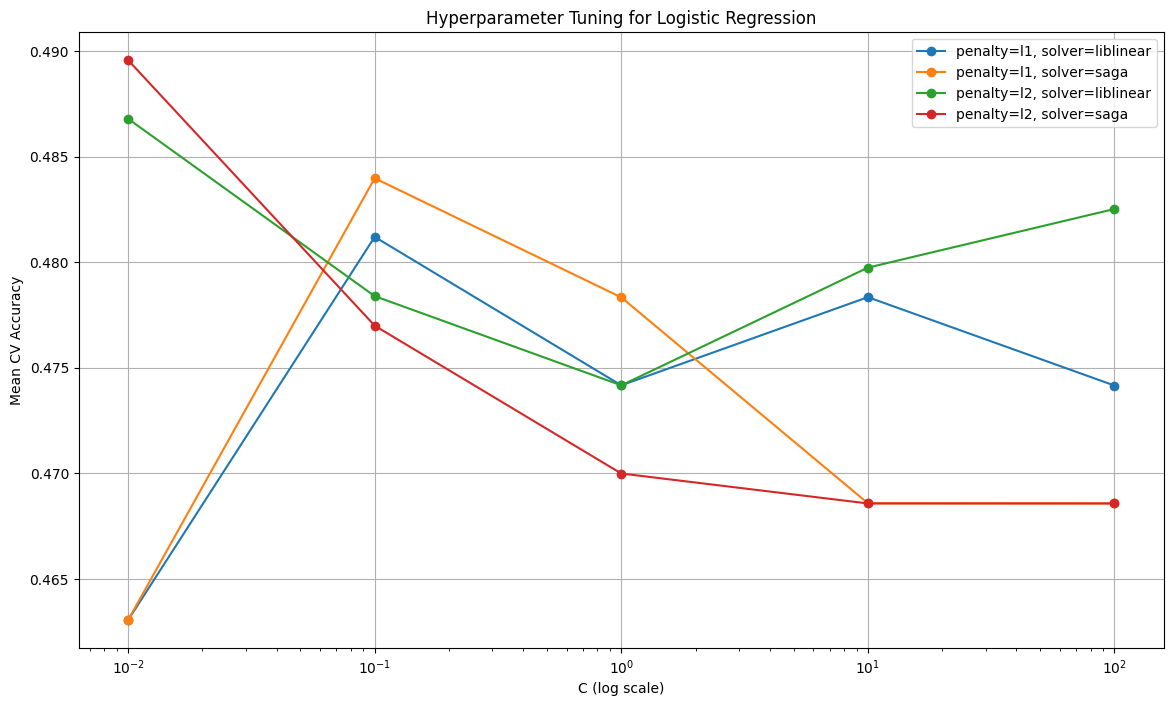

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'X' and 'y' are your features and target variable respectively
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],      # Inverse of regularization strength
    'penalty': ['l1', 'l2'],           # Type of regularization
    'solver': ['liblinear', 'saga']    # Algorithm to use in the optimization problem
}

# Define and train the Logistic Regression model using GridSearchCV
logreg_model = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters found
best_params = grid_search.best_params_

# Create a new Logistic Regression model with the best parameters
best_logreg_model = LogisticRegression(**best_params, max_iter=1000)

# Train the model with the entire training set
best_logreg_model.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", best_params)

# Print training and validation scores
print("Training Score:", best_logreg_model.score(X_train, y_train))
print("Test Score:", best_logreg_model.score(X_test, y_test))

# Make predictions on the test set
y_pred = best_logreg_model.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred)
print(report)

# Calculate additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Sensitivity (Recall of the positive class)
sensitivity = recall_score(y_test, y_pred, average='macro')
# Specificity (Recall of the negative class)
specificity = recall_score(y_test, y_pred, average='macro')

# Print additional metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the accuracy results for different hyperparameter combinations
results = grid_search.cv_results_
scores = results['mean_test_score']
params = results['params']

# Convert params to a format suitable for plotting
C_values = np.array([p['C'] for p in params])
penalties = np.array([p['penalty'] for p in params])
solvers = np.array([p['solver'] for p in params])

# Create line plots for the accuracy changes with different hyperparameters
plt.figure(figsize=(14, 8))

# Plotting accuracy vs. C values
for penalty in np.unique(penalties):
    for solver in np.unique(solvers):
        mask = (penalties == penalty) & (solvers == solver)
        plt.plot(C_values[mask], scores[mask], marker='o', linestyle='-', label=f'penalty={penalty}, solver={solver}')

plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Mean CV Accuracy')
plt.title('Hyperparameter Tuning for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1613
[LightGBM] [Info] Number of data points in the train set: 717, number of used features: 23
[LightGBM] [Info] Start training from score -1.296961
[LightGBM] [Info] Start training from score -0.769941
[LightGBM] [Info] Start training from score -1.506172
[LightGBM] [Info] Start training from score -3.173878
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


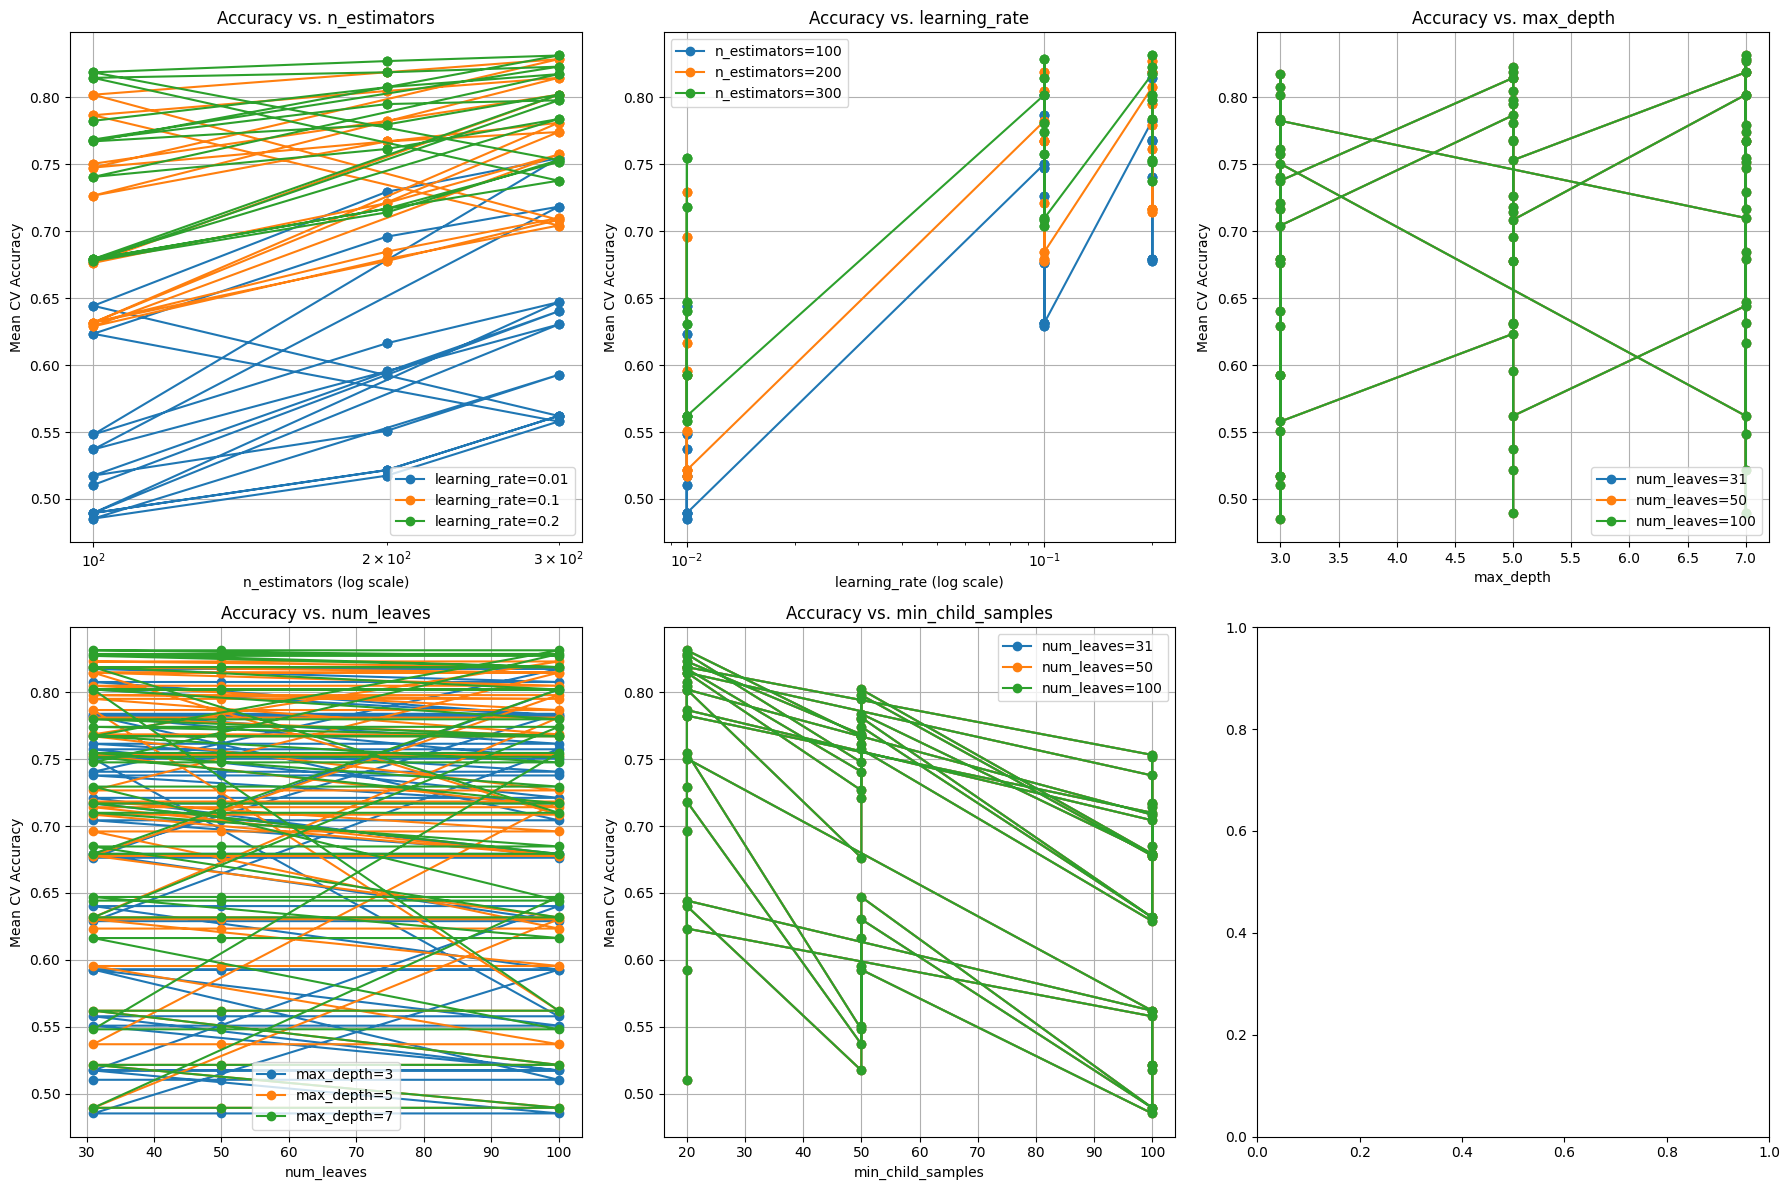

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Submission file saved successfully.


In [ ]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Separate features and target variable from the training dataset
X_train = X
y_train = y

# Split the training data for evaluation purposes
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Define hyperparameter grid for LightGBM
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],    # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7],               # Maximum depth of the individual trees
    'num_leaves': [31, 50, 100],          # Maximum number of leaves in one tree
    'min_child_samples': [20, 50, 100]    # Minimum number of data needed in a child (leaf)
}

# Define and train the LightGBM model
lgb_model = LGBMClassifier(random_state=42)
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_split, y_train_split)

# Get the best parameters found
best_params = grid_search.best_params_

# Create a new LightGBM model with the best parameters
best_lgb_model = LGBMClassifier(**best_params)

# Train the model with the entire training set
best_lgb_model.fit(X_train_split, y_train_split)

# Print best parameters
print("Best Parameters:", best_params)

# Print training and validation scores
print("Training Score:", best_lgb_model.score(X_train_split, y_train_split))
print("Validation Score:", best_lgb_model.score(X_val, y_val))

# Make predictions on the validation set
y_pred = best_lgb_model.predict(X_val)

# Print classification report
report = classification_report(y_val, y_pred)
print(report)

# Calculate additional metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Sensitivity (Recall of the positive class)
sensitivity = recall_score(y_val, y_pred, pos_label=1, average='macro')
# Specificity (Recall of the negative class)
specificity = recall_score(y_val, y_pred, pos_label=0, average='macro')

# Print additional metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the accuracy results for different hyperparameter combinations
results = grid_search.cv_results_
scores = results['mean_test_score']
params = results['params']

# Convert params to a format suitable for plotting
n_estimators = np.array([p['n_estimators'] for p in params])
learning_rates = np.array([p['learning_rate'] for p in params])
max_depths = np.array([p['max_depth'] for p in params])
num_leaves = np.array([p['num_leaves'] for p in params])
min_child_samples = np.array([p['min_child_samples'] for p in params])

# Create subplots for each hyperparameter
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Plotting accuracy vs. n_estimators
for lr in np.unique(learning_rates):
    mask = learning_rates == lr
    axes[0].plot(n_estimators[mask], scores[mask], marker='o', linestyle='-', label=f'learning_rate={lr}')
axes[0].set_xscale('log')
axes[0].set_xlabel('n_estimators (log scale)')
axes[0].set_ylabel('Mean CV Accuracy')
axes[0].set_title('Accuracy vs. n_estimators')
axes[0].legend()
axes[0].grid(True)

# Plotting accuracy vs. learning_rate
for n_est in np.unique(n_estimators):
    mask = n_estimators == n_est
    axes[1].plot(learning_rates[mask], scores[mask], marker='o', linestyle='-', label=f'n_estimators={n_est}')
axes[1].set_xscale('log')
axes[1].set_xlabel('learning_rate (log scale)')
axes[1].set_ylabel('Mean CV Accuracy')
axes[1].set_title('Accuracy vs. learning_rate')
axes[1].legend()
axes[1].grid(True)

# Plotting accuracy vs. max_depth
for n_leaves in np.unique(num_leaves):
    mask = num_leaves == n_leaves
    axes[2].plot(max_depths[mask], scores[mask], marker='o', linestyle='-', label=f'num_leaves={n_leaves}')
axes[2].set_xlabel('max_depth')
axes[2].set_ylabel('Mean CV Accuracy')
axes[2].set_title('Accuracy vs. max_depth')
axes[2].legend()
axes[2].grid(True)

# Plotting accuracy vs. num_leaves
for m_depth in np.unique(max_depths):
    mask = max_depths == m_depth
    axes[3].plot(num_leaves[mask], scores[mask], marker='o', linestyle='-', label=f'max_depth={m_depth}')
axes[3].set_xlabel('num_leaves')
axes[3].set_ylabel('Mean CV Accuracy')
axes[3].set_title('Accuracy vs. num_leaves')
axes[3].legend()
axes[3].grid(True)

# Plotting accuracy vs. min_child_samples
for n_leaves in np.unique(num_leaves):
    mask = num_leaves == n_leaves
    axes[4].plot(min_child_samples[mask], scores[mask], marker='o', linestyle='-', label=f'num_leaves={n_leaves}')
axes[4].set_xlabel('min_child_samples')
axes[4].set_ylabel('Mean CV Accuracy')
axes[4].set_title('Accuracy vs. min_child_samples')
axes[4].legend()
axes[4].grid(True)

plt.tight_layout()
plt.show()

# Make final predictions
X_test_final = X_test_selected_df.drop(columns=['id'])
final_predictions = best_lgb_model.predict(X_test_final)

# Define the mapping for 'completion_status'
completion_status_mapping = {
    0: 'Default',
    1: 'Paid in full',
    2: 'Paid off with renewal',
    3: 'Paid via discounted payoff'
}

# Convert numeric predictions to categorical labels
mapped_predictions = [completion_status_mapping[pred] for pred in final_predictions]

# Create submission DataFrame
submission = pd.DataFrame({'id': X_test_selected_df['id'], 'completion_status': mapped_predictions})

# Save submission DataFrame to CSV
submission.to_csv('submission_LGBMClassifier_tuned(Grid Search).csv', index=False)

# Display success message
print("Submission file saved successfully.")


Best Parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200}
Training Score: 1.0
Validation Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00        10

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Sensitivity: 1.0
Specificity: 1.0
Confusion Matrix:
[[ 46   0   0   0]
 [  0 101   0   0]
 [  0   0  48   0]
 [  0   0   0  10]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


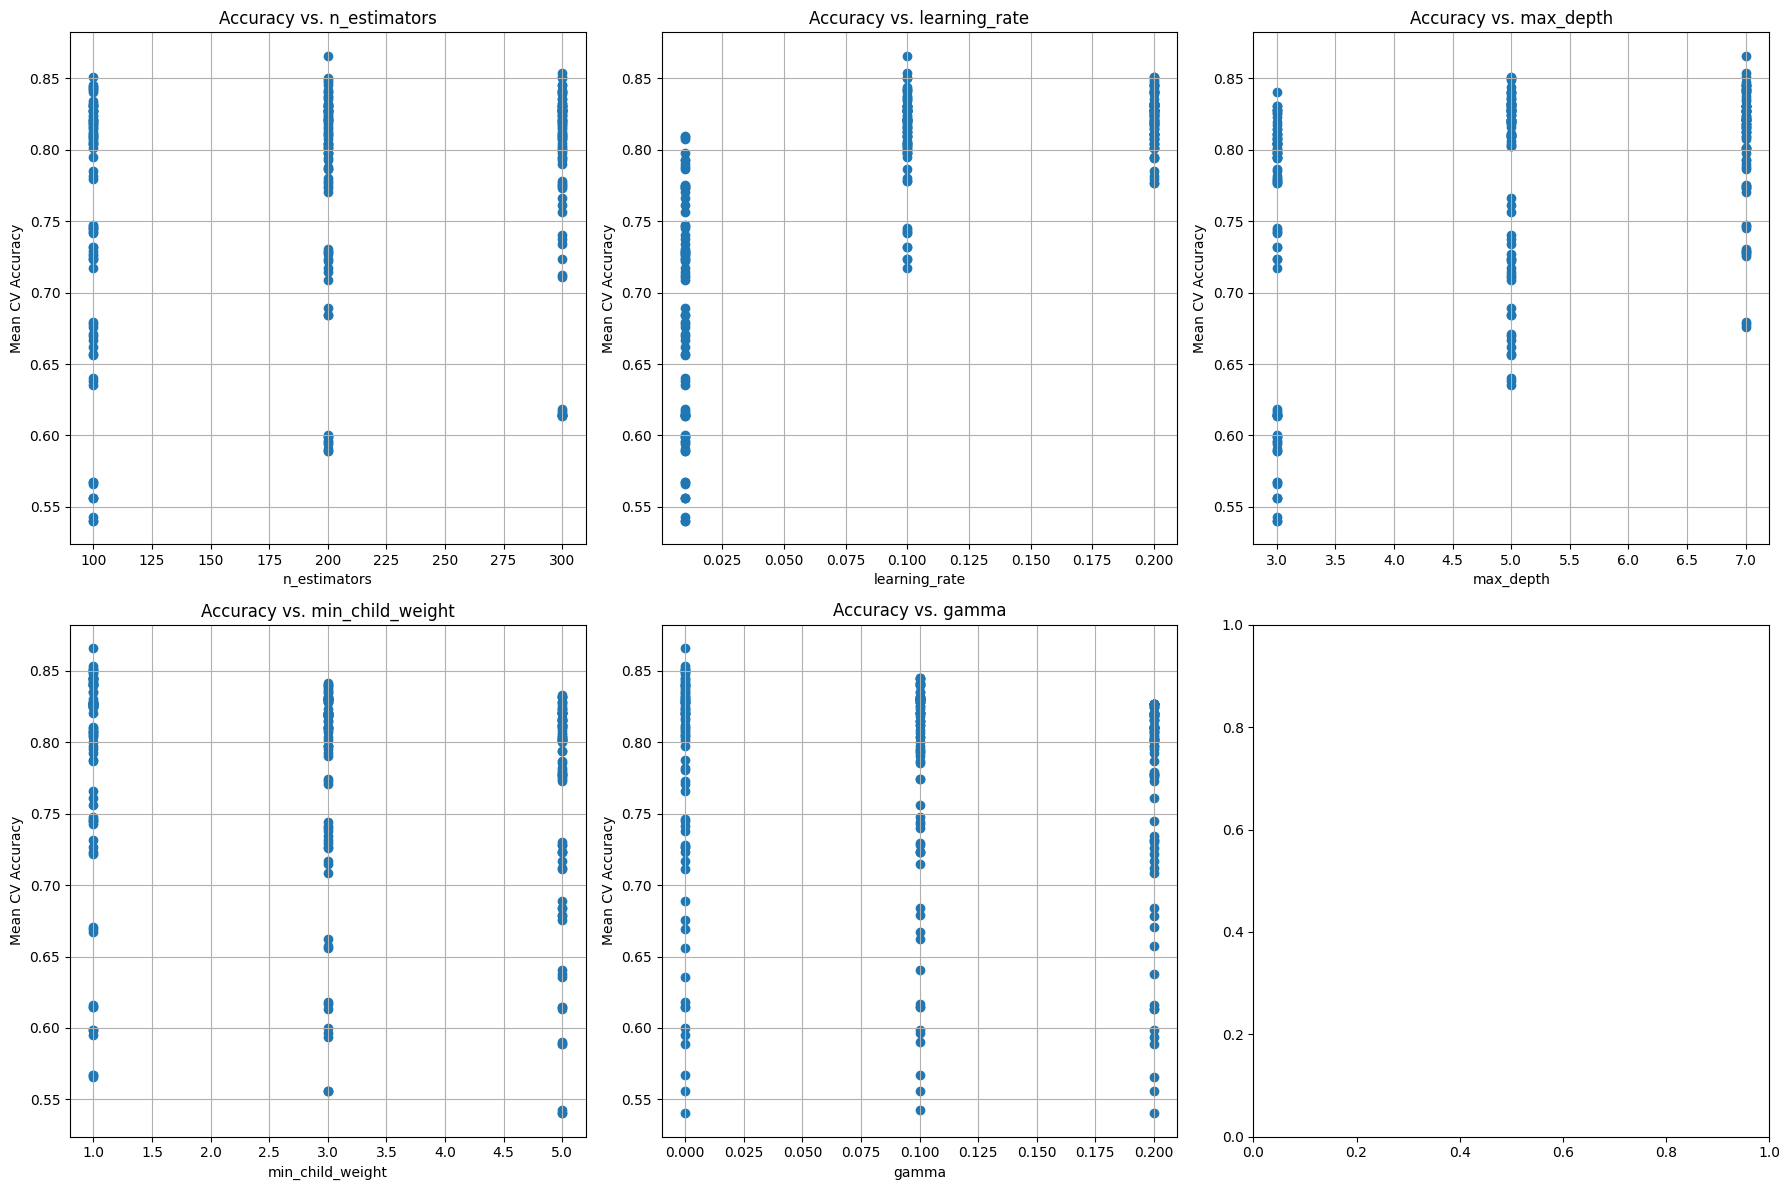

Missing values in X_test_final: owner_1_score                           0
RATE_owner_1                            0
CAP_AMOUNT_owner_1                      0
PERCENT_OWN_owner_1                     0
years_in_business                       0
RATE_ID_FOR_years_in_business           0
fsr                                     0
funded_last_30                          0
RATE_ID_FOR_judgement_lien_percent      0
INPUT_VALUE_ID_FOR_num_negative_days    0
RATE_ID_FOR_num_negative_days           0
INPUT_VALUE_ID_FOR_num_deposits         0
RATE_ID_FOR_num_deposits                0
INPUT_VALUE_ID_FOR_monthly_gross        0
INPUT_VALUE_ID_FOR_average_ledger       0
RATE_ID_FOR_average_ledger              0
INPUT_VALUE_ID_FOR_fc_margin            0
INPUT_VALUE_ID_FOR_tax_lien_amount      0
INPUT_VALUE_ID_FOR_tax_lien_count       0
RATE_ID_FOR_tax_lien_count              0
INPUT_VALUE_ID_FOR_current_position     0
RATE_ID_FOR_current_position            0
INPUT_VALUE_ID_FOR_avg_net_deposits     0
IN

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Separate features and target variable from the training dataset
X_train = X
y_train = y

# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],    # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7],               # Maximum depth of the individual trees
    'min_child_weight': [1, 3, 5],        # Minimum sum of instance weight (hessian) needed in a child
    'gamma': [0, 0.1, 0.2]                # Minimum loss reduction required to make a further partition on a leaf node
}

# Define and train the XGBoost model using GridSearchCV
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_split, y_train_split)

# Get the best parameters found
best_params = grid_search.best_params_

# Create a new XGBoost model with the best parameters
best_xgb_model = XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model with the entire training set
best_xgb_model.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", best_params)

# Print training and validation scores
print("Training Score:", best_xgb_model.score(X_train, y_train))
print("Validation Score:", best_xgb_model.score(X_val_split, y_val_split))

# Make predictions on the validation set
y_pred = best_xgb_model.predict(X_val_split)

# Print classification report
report = classification_report(y_val_split, y_pred)
print(report)

# Calculate additional metrics
accuracy = accuracy_score(y_val_split, y_pred)
precision = precision_score(y_val_split, y_pred, average='weighted')
recall = recall_score(y_val_split, y_pred, average='weighted')
f1 = f1_score(y_val_split, y_pred, average='weighted')

# Sensitivity (Recall of the positive class)
sensitivity = recall_score(y_val_split, y_pred, pos_label=1, average='macro')
# Specificity (Recall of the negative class)
specificity = recall_score(y_val_split, y_pred, pos_label=0, average='macro')

# Print additional metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_val_split, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the accuracy results for different hyperparameter combinations
results = grid_search.cv_results_
scores = results['mean_test_score']
params = results['params']

# Convert params to a format suitable for plotting
n_estimators = [p['n_estimators'] for p in params]
learning_rate = [p['learning_rate'] for p in params]
max_depth = [p['max_depth'] for p in params]
min_child_weight = [p['min_child_weight'] for p in params]
gamma = [p['gamma'] for p in params]

# Create subplots for each hyperparameter
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Plotting accuracy vs. n_estimators
axes[0].scatter(n_estimators, scores)
axes[0].set_xlabel('n_estimators')
axes[0].set_ylabel('Mean CV Accuracy')
axes[0].set_title('Accuracy vs. n_estimators')
axes[0].grid(True)

# Plotting accuracy vs. learning_rate
axes[1].scatter(learning_rate, scores)
axes[1].set_xlabel('learning_rate')
axes[1].set_ylabel('Mean CV Accuracy')
axes[1].set_title('Accuracy vs. learning_rate')
axes[1].grid(True)

# Plotting accuracy vs. max_depth
axes[2].scatter(max_depth, scores)
axes[2].set_xlabel('max_depth')
axes[2].set_ylabel('Mean CV Accuracy')
axes[2].set_title('Accuracy vs. max_depth')
axes[2].grid(True)

# Plotting accuracy vs. min_child_weight
axes[3].scatter(min_child_weight, scores)
axes[3].set_xlabel('min_child_weight')
axes[3].set_ylabel('Mean CV Accuracy')
axes[3].set_title('Accuracy vs. min_child_weight')
axes[3].grid(True)

# Plotting accuracy vs. gamma
axes[4].scatter(gamma, scores)
axes[4].set_xlabel('gamma')
axes[4].set_ylabel('Mean CV Accuracy')
axes[4].set_title('Accuracy vs. gamma')
axes[4].grid(True)

plt.tight_layout()
plt.show()

# Prepare the test set for final prediction (without 'id' column)
X_test_final = X_test_selected_df.drop(columns=['id'])
print("Missing values in X_test_final:", X_test_final.isnull().sum())

# Make final predictions
final_predictions = best_xgb_model.predict(X_test_final)

# Define the mapping for 'completion_status'
completion_status_mapping = {
    0: 'Default',
    1: 'Paid in full',
    2: 'Paid off with renewal',
    3: 'Paid via discounted payoff'
}

# Convert numeric predictions to categorical labels
mapped_predictions = [completion_status_mapping[pred] for pred in final_predictions]

# Create submission DataFrame
submission = pd.DataFrame({'id': X_test_selected_df['id'], 'completion_status': mapped_predictions})

# Save submission DataFrame to CSV
submission.to_csv('submission_XGBClassifier_tuned(Grid Search).csv', index=False)

# Display success message
print("Submission file saved successfully.")


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Training Score: 1.0
Validation Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00        10

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Sensitivity: 1.0
Specificity: 1.0
Confusion Matrix:
[[ 46   0   0   0]
 [  0 101   0   0]
 [  0   0  48   0]
 [  0   0   0  10]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


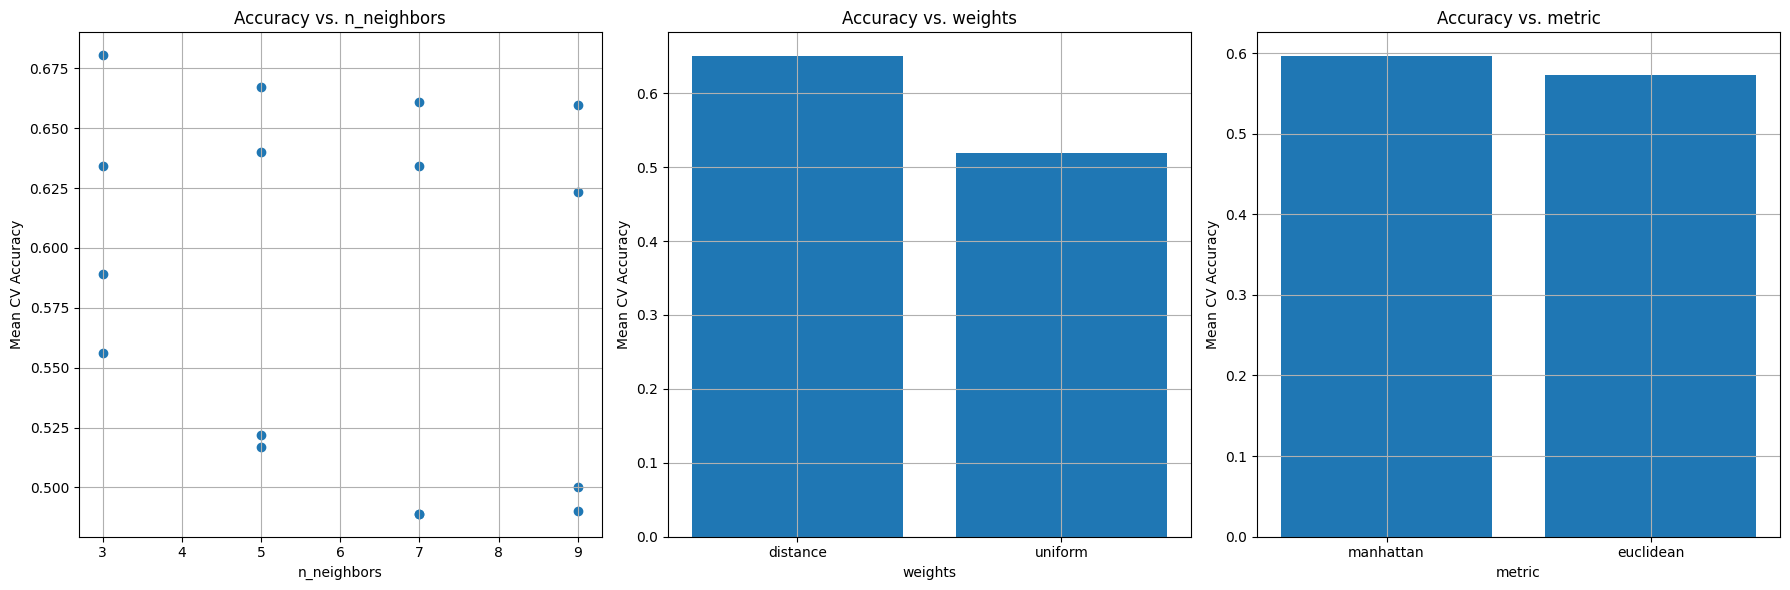

Missing values in X_test_final: owner_1_score                           0
RATE_owner_1                            0
CAP_AMOUNT_owner_1                      0
PERCENT_OWN_owner_1                     0
years_in_business                       0
RATE_ID_FOR_years_in_business           0
fsr                                     0
funded_last_30                          0
RATE_ID_FOR_judgement_lien_percent      0
INPUT_VALUE_ID_FOR_num_negative_days    0
RATE_ID_FOR_num_negative_days           0
INPUT_VALUE_ID_FOR_num_deposits         0
RATE_ID_FOR_num_deposits                0
INPUT_VALUE_ID_FOR_monthly_gross        0
INPUT_VALUE_ID_FOR_average_ledger       0
RATE_ID_FOR_average_ledger              0
INPUT_VALUE_ID_FOR_fc_margin            0
INPUT_VALUE_ID_FOR_tax_lien_amount      0
INPUT_VALUE_ID_FOR_tax_lien_count       0
RATE_ID_FOR_tax_lien_count              0
INPUT_VALUE_ID_FOR_current_position     0
RATE_ID_FOR_current_position            0
INPUT_VALUE_ID_FOR_avg_net_deposits     0
IN

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Separate features and target variable from the training dataset
X_train = X
y_train = y

# Split the data into training and validation sets for evaluation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],        # Number of neighbors to use
    'weights': ['uniform', 'distance'], # Weight function used in prediction
    'metric': ['euclidean', 'manhattan'] # Distance metric
}

# Define and train the KNN model using GridSearchCV
knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_split, y_train_split)

# Get the best parameters found
best_params = grid_search.best_params_

# Create a new KNN model with the best parameters
best_knn_model = KNeighborsClassifier(**best_params)

# Train the model with the entire training set
best_knn_model.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", best_params)

# Print training and validation scores
print("Training Score:", best_knn_model.score(X_train, y_train))
print("Validation Score:", best_knn_model.score(X_val_split, y_val_split))

# Make predictions on the validation set
y_pred = best_knn_model.predict(X_val_split)

# Print classification report
report = classification_report(y_val_split, y_pred)
print(report)

# Calculate additional metrics
accuracy = accuracy_score(y_val_split, y_pred)
precision = precision_score(y_val_split, y_pred, average='weighted')
recall = recall_score(y_val_split, y_pred, average='weighted')
f1 = f1_score(y_val_split, y_pred, average='weighted')

# Sensitivity (Recall of the positive class)
sensitivity = recall_score(y_val_split, y_pred, pos_label=1, average='macro')
# Specificity (Recall of the negative class)
specificity = recall_score(y_val_split, y_pred, pos_label=0, average='macro')

# Print additional metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_val_split, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the accuracy results for different hyperparameter combinations
results = grid_search.cv_results_
scores = results['mean_test_score']
params = results['params']

# Convert params to a format suitable for plotting
n_neighbors = [p['n_neighbors'] for p in params]
weights = [p['weights'] for p in params]
metric = [p['metric'] for p in params]

# Create subplots for each hyperparameter
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting accuracy vs. n_neighbors
axes[0].scatter(n_neighbors, scores)
axes[0].set_xlabel('n_neighbors')
axes[0].set_ylabel('Mean CV Accuracy')
axes[0].set_title('Accuracy vs. n_neighbors')
axes[0].grid(True)

# Plotting accuracy vs. weights
unique_weights = list(set(weights))
mean_scores_weights = [np.mean([score for score, weight in zip(scores, weights) if weight == w]) for w in unique_weights]
axes[1].bar(unique_weights, mean_scores_weights)
axes[1].set_xlabel('weights')
axes[1].set_ylabel('Mean CV Accuracy')
axes[1].set_title('Accuracy vs. weights')
axes[1].grid(True)

# Plotting accuracy vs. metric
unique_metrics = list(set(metric))
mean_scores_metrics = [np.mean([score for score, met in zip(scores, metric) if met == m]) for m in unique_metrics]
axes[2].bar(unique_metrics, mean_scores_metrics)
axes[2].set_xlabel('metric')
axes[2].set_ylabel('Mean CV Accuracy')
axes[2].set_title('Accuracy vs. metric')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Prepare the test set for final prediction (without 'id' column)
X_test_final = X_test_selected_df.drop(columns=['id'])
print("Missing values in X_test_final:", X_test_final.isnull().sum())

# Make final predictions
final_predictions = best_knn_model.predict(X_test_final)

# Define the mapping for 'completion_status'
completion_status_mapping = {
    0: 'Default',
    1: 'Paid in full',
    2: 'Paid off with renewal',
    3: 'Paid via discounted payoff'
}

# Convert numeric predictions to categorical labels
mapped_predictions = [completion_status_mapping[pred] for pred in final_predictions]

# Create submission DataFrame
submission = pd.DataFrame({'id': X_test_selected_df['id'], 'completion_status': mapped_predictions})

# Save submission DataFrame to CSV
submission.to_csv('submission_KNeighborsClassifier_tuned(Grid Search).csv', index=False)

# Display success message
print("Submission file saved successfully.")


Best Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (150, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Training Score: 0.953170731707317
Validation Score: 0.9609756097560975
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        46
           1       0.95      0.97      0.96       101
           2       0.94      0.98      0.96        48
           3       1.00      0.80      0.89        10

    accuracy                           0.96       205
   macro avg       0.97      0.93      0.95       205
weighted avg       0.96      0.96      0.96       205

Accuracy: 0.9609756097560975
Precision: 0.9620345725787355
Recall: 0.9609756097560975
F1 Score: 0.9607156033144965
Sensitivity: 0.9264963588750179
Specificity: 0.9264963588750179
Confusion Matrix:
[[44  2  0  0]
 [ 0 98  3  0]
 [ 0  1 47  0]
 [ 0  2  0  8]]
Missing values in X_test_final: owner_1_score                           0
RATE_owner_1              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


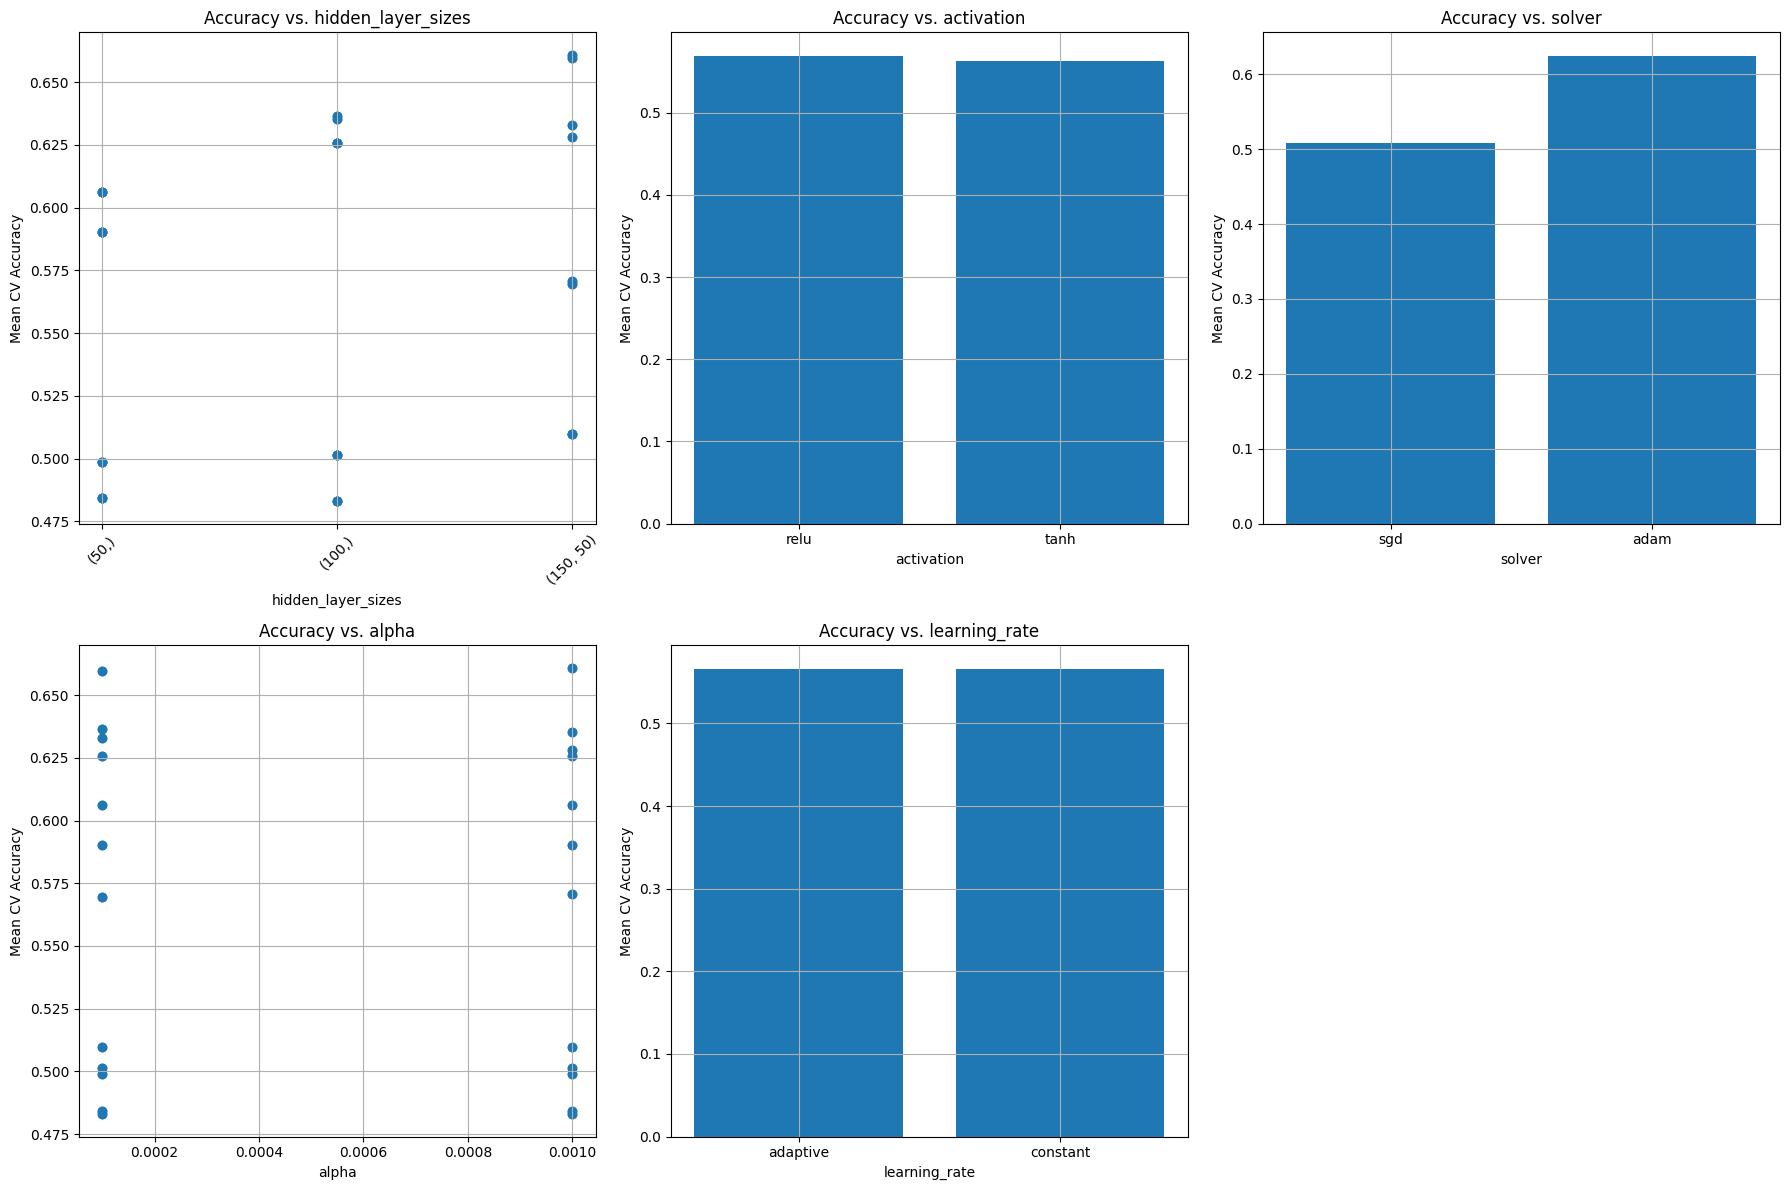

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt

# Separate features and target variable from the training dataset
X_train = X
y_train = y

# Split the data into training and validation sets for evaluation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150, 50)],  # Sizes of hidden layers
    'activation': ['tanh', 'relu'],                   # Activation function
    'solver': ['sgd', 'adam'],                        # Solver for weight optimization
    'alpha': [0.0001, 0.001],                         # Regularization parameter
    'learning_rate': ['constant', 'adaptive']         # Learning rate schedule
}

# Define and train the MLP model using GridSearchCV
mlp_model = MLPClassifier(max_iter=1000, random_state=42)
grid_search = GridSearchCV(estimator=mlp_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_split, y_train_split)

# Get the best parameters found
best_params = grid_search.best_params_

# Create a new MLP model with the best parameters
best_mlp_model = MLPClassifier(**best_params, max_iter=1000, random_state=42)

# Train the model with the entire training set
best_mlp_model.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", best_params)

# Print training and validation scores
print("Training Score:", best_mlp_model.score(X_train, y_train))
print("Validation Score:", best_mlp_model.score(X_val_split, y_val_split))

# Make predictions on the validation set
y_pred = best_mlp_model.predict(X_val_split)

# Print classification report
report = classification_report(y_val_split, y_pred)
print(report)

# Calculate additional metrics
accuracy = accuracy_score(y_val_split, y_pred)
precision = precision_score(y_val_split, y_pred, average='weighted')
recall = recall_score(y_val_split, y_pred, average='weighted')
f1 = f1_score(y_val_split, y_pred, average='weighted')

# Sensitivity (Recall of the positive class)
sensitivity = recall_score(y_val_split, y_pred, pos_label=1, average='macro')
# Specificity (Recall of the negative class)
specificity = recall_score(y_val_split, y_pred, pos_label=0, average='macro')

# Print additional metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_val_split, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Prepare the test set for final prediction (without 'id' column)
X_test_final = X_test_selected_df.drop(columns=['id'])
print("Missing values in X_test_final:", X_test_final.isnull().sum())

# Make final predictions
final_predictions = best_mlp_model.predict(X_test_final)

# Define the mapping for 'completion_status'
completion_status_mapping = {
    0: 'Default',
    1: 'Paid in full',
    2: 'Paid off with renewal',
    3: 'Paid via discounted payoff'
}

# Convert numeric predictions to categorical labels
mapped_predictions = [completion_status_mapping[pred] for pred in final_predictions]

# Create submission DataFrame
submission = pd.DataFrame({'id': X_test_selected_df['id'], 'completion_status': mapped_predictions})

# Save submission DataFrame to CSV
submission.to_csv('submission_MLPClassifier_tuned(Grid Search).csv', index=False)

# Display success message
print("Submission file saved successfully.")

# Plot the accuracy results for different hyperparameter combinations
results = grid_search.cv_results_
scores = results['mean_test_score']
params = results['params']

# Convert params to a format suitable for plotting
hidden_layer_sizes = [str(p['hidden_layer_sizes']) for p in params]
activation = [p['activation'] for p in params]
solver = [p['solver'] for p in params]
alpha = [p['alpha'] for p in params]
learning_rate = [p['learning_rate'] for p in params]

# Create subplots for each hyperparameter
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plotting accuracy vs. hidden_layer_sizes
axes[0, 0].scatter(hidden_layer_sizes, scores)
axes[0, 0].set_xlabel('hidden_layer_sizes')
axes[0, 0].set_ylabel('Mean CV Accuracy')
axes[0, 0].set_title('Accuracy vs. hidden_layer_sizes')
axes[0, 0].grid(True)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plotting accuracy vs. activation
unique_activation = list(set(activation))
mean_scores_activation = [np.mean([score for score, act in zip(scores, activation) if act == a]) for a in unique_activation]
axes[0, 1].bar(unique_activation, mean_scores_activation)
axes[0, 1].set_xlabel('activation')
axes[0, 1].set_ylabel('Mean CV Accuracy')
axes[0, 1].set_title('Accuracy vs. activation')
axes[0, 1].grid(True)

# Plotting accuracy vs. solver
unique_solver = list(set(solver))
mean_scores_solver = [np.mean([score for score, sol in zip(scores, solver) if sol == s]) for s in unique_solver]
axes[0, 2].bar(unique_solver, mean_scores_solver)
axes[0, 2].set_xlabel('solver')
axes[0, 2].set_ylabel('Mean CV Accuracy')
axes[0, 2].set_title('Accuracy vs. solver')
axes[0, 2].grid(True)

# Plotting accuracy vs. alpha
axes[1, 0].scatter(alpha, scores)
axes[1, 0].set_xlabel('alpha')
axes[1, 0].set_ylabel('Mean CV Accuracy')
axes[1, 0].set_title('Accuracy vs. alpha')
axes[1, 0].grid(True)

# Plotting accuracy vs. learning_rate
unique_learning_rate = list(set(learning_rate))
mean_scores_learning_rate = [np.mean([score for score, lr in zip(scores, learning_rate) if lr == l]) for l in unique_learning_rate]
axes[1, 1].bar(unique_learning_rate, mean_scores_learning_rate)
axes[1, 1].set_xlabel('learning_rate')
axes[1, 1].set_ylabel('Mean CV Accuracy')
axes[1, 1].set_title('Accuracy vs. learning_rate')
axes[1, 1].grid(True)

# Hide the unused subplot (axes[1, 2])
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training Score: 1.0
Validation Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00        10

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


Accuracy: 1.0000

Confusion Matrix:
[[ 46   0   0   0]
 [  0 101   0   0]
 [  0   0  48   0]
 [  0   0   0  10]]
Precision (Macro): 1.0
Recall (Macro): 1.0
F1-Score (Macro): 1.0
Sensitivity (Macro Recall): 1.0
Specificity per class: [1.0, 1.0, 1.0, 1.0]


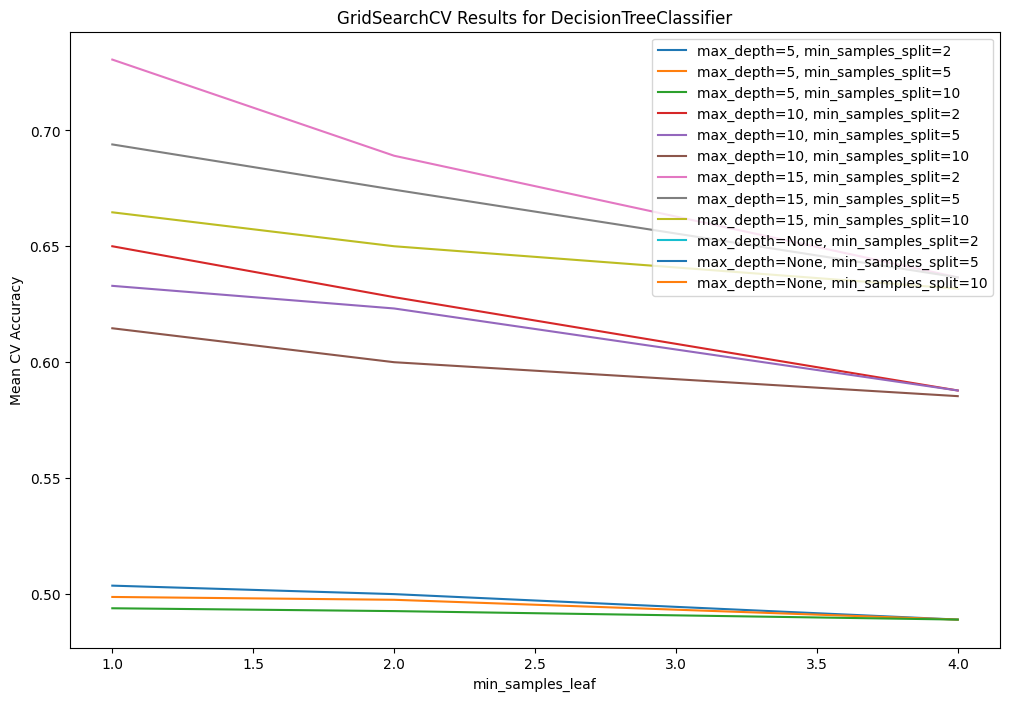


Missing values in X_test_final: owner_1_score                           0
RATE_owner_1                            0
CAP_AMOUNT_owner_1                      0
PERCENT_OWN_owner_1                     0
years_in_business                       0
RATE_ID_FOR_years_in_business           0
fsr                                     0
funded_last_30                          0
RATE_ID_FOR_judgement_lien_percent      0
INPUT_VALUE_ID_FOR_num_negative_days    0
RATE_ID_FOR_num_negative_days           0
INPUT_VALUE_ID_FOR_num_deposits         0
RATE_ID_FOR_num_deposits                0
INPUT_VALUE_ID_FOR_monthly_gross        0
INPUT_VALUE_ID_FOR_average_ledger       0
RATE_ID_FOR_average_ledger              0
INPUT_VALUE_ID_FOR_fc_margin            0
INPUT_VALUE_ID_FOR_tax_lien_amount      0
INPUT_VALUE_ID_FOR_tax_lien_count       0
RATE_ID_FOR_tax_lien_count              0
INPUT_VALUE_ID_FOR_current_position     0
RATE_ID_FOR_current_position            0
INPUT_VALUE_ID_FOR_avg_net_deposits     0
I

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Separate features and target variable from the training dataset
X_train = X
y_train = y

# Split the data into training and validation sets for evaluation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 15, None],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required at each leaf node
}

# Define and train the decision tree model using GridSearchCV
dt_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_split, y_train_split)

# Get the best parameters found
best_params = grid_search.best_params_

# Create a new decision tree model with the best parameters
best_dt_model = DecisionTreeClassifier(**best_params, random_state=42)

# Train the model with the entire training set
best_dt_model.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", best_params)

# Print training and validation scores
print("Training Score:", best_dt_model.score(X_train, y_train))
print("Validation Score:", best_dt_model.score(X_val_split, y_val_split))

# Make predictions on the validation set
y_pred = best_dt_model.predict(X_val_split)

# Print classification report
report = classification_report(y_val_split, y_pred)
print("Classification Report:\n", report)

# Calculate and print accuracy, precision, recall, F1-score, sensitivity, specificity
accuracy = accuracy_score(y_val_split, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_val_split, y_pred)
print(f"\nConfusion Matrix:\n{conf_matrix}")


# For multiclass, calculate precision, recall, and F1-score with 'macro' averaging
precision = precision_score(y_val_split, y_pred, average='macro')
recall = recall_score(y_val_split, y_pred, average='macro')
f1 = f1_score(y_val_split, y_pred, average='macro')

# Sensitivity (Recall of the positive class) for multiclass case
sensitivity = recall  # In multiclass, sensitivity is the same as recall

# Specificity for each class
specificity_per_class = []
for i in range(conf_matrix.shape[0]):
    # True negatives are all values not in the current class (i)
    TN = np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1))
    # False positives are all values in the current class column, except the true positives
    FP = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    specificity = TN / (TN + FP)
    specificity_per_class.append(specificity)

print("Precision (Macro):", precision)
print("Recall (Macro):", recall)
print("F1-Score (Macro):", f1)
print("Sensitivity (Macro Recall):", sensitivity)
print("Specificity per class:", specificity_per_class)

# Plotting the accuracy results for different hyperparameter combinations
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(12, 8))

# Plot the accuracy for different hyperparameter combinations
for max_depth in param_grid['max_depth']:
    for min_samples_split in param_grid['min_samples_split']:
        subset = results[(results['param_max_depth'] == max_depth) &
                         (results['param_min_samples_split'] == min_samples_split)]
        plt.plot(subset['param_min_samples_leaf'], subset['mean_test_score'],
                 label=f'max_depth={max_depth}, min_samples_split={min_samples_split}')

plt.legend()
plt.xlabel('min_samples_leaf')
plt.ylabel('Mean CV Accuracy')
plt.title('GridSearchCV Results for DecisionTreeClassifier')
plt.show()

# Prepare the test set for final prediction (without 'id' column)
X_test_final = X_test_selected_df.drop(columns=['id'])
print("\nMissing values in X_test_final:", X_test_final.isnull().sum())

# Make final predictions
final_predictions = best_dt_model.predict(X_test_final)

# Define the mapping for 'completion_status'
completion_status_mapping = {
    0: 'Default',
    1: 'Paid in full',
    2: 'Paid off with renewal',
    3: 'Paid via discounted payoff'
}

# Convert numeric predictions to categorical labels
mapped_predictions = [completion_status_mapping[pred] for pred in final_predictions]

# Create submission DataFrame
submission = pd.DataFrame({'id': X_test_selected_df['id'], 'completion_status': mapped_predictions})

# Save submission DataFrame to CSV
submission.to_csv('submission_DecisionTreeClassifier_tuned(Grid Search).csv', index=False)

# Display success message
print("\nSubmission file saved successfully.")


Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       278
           1       1.00      1.00      1.00       477
           2       1.00      1.00      1.00       226
           3       1.00      1.00      1.00        44

    accuracy                           1.00      1025
   macro avg       1.00      1.00      1.00      1025
weighted avg       1.00      1.00      1.00      1025


Accuracy: 1.0000

Confusion Matrix:
[[278   0   0   0]
 [  0 477   0   0]
 [  0   0 226   0]
 [  0   0   0  44]]

Submission file saved successfully.


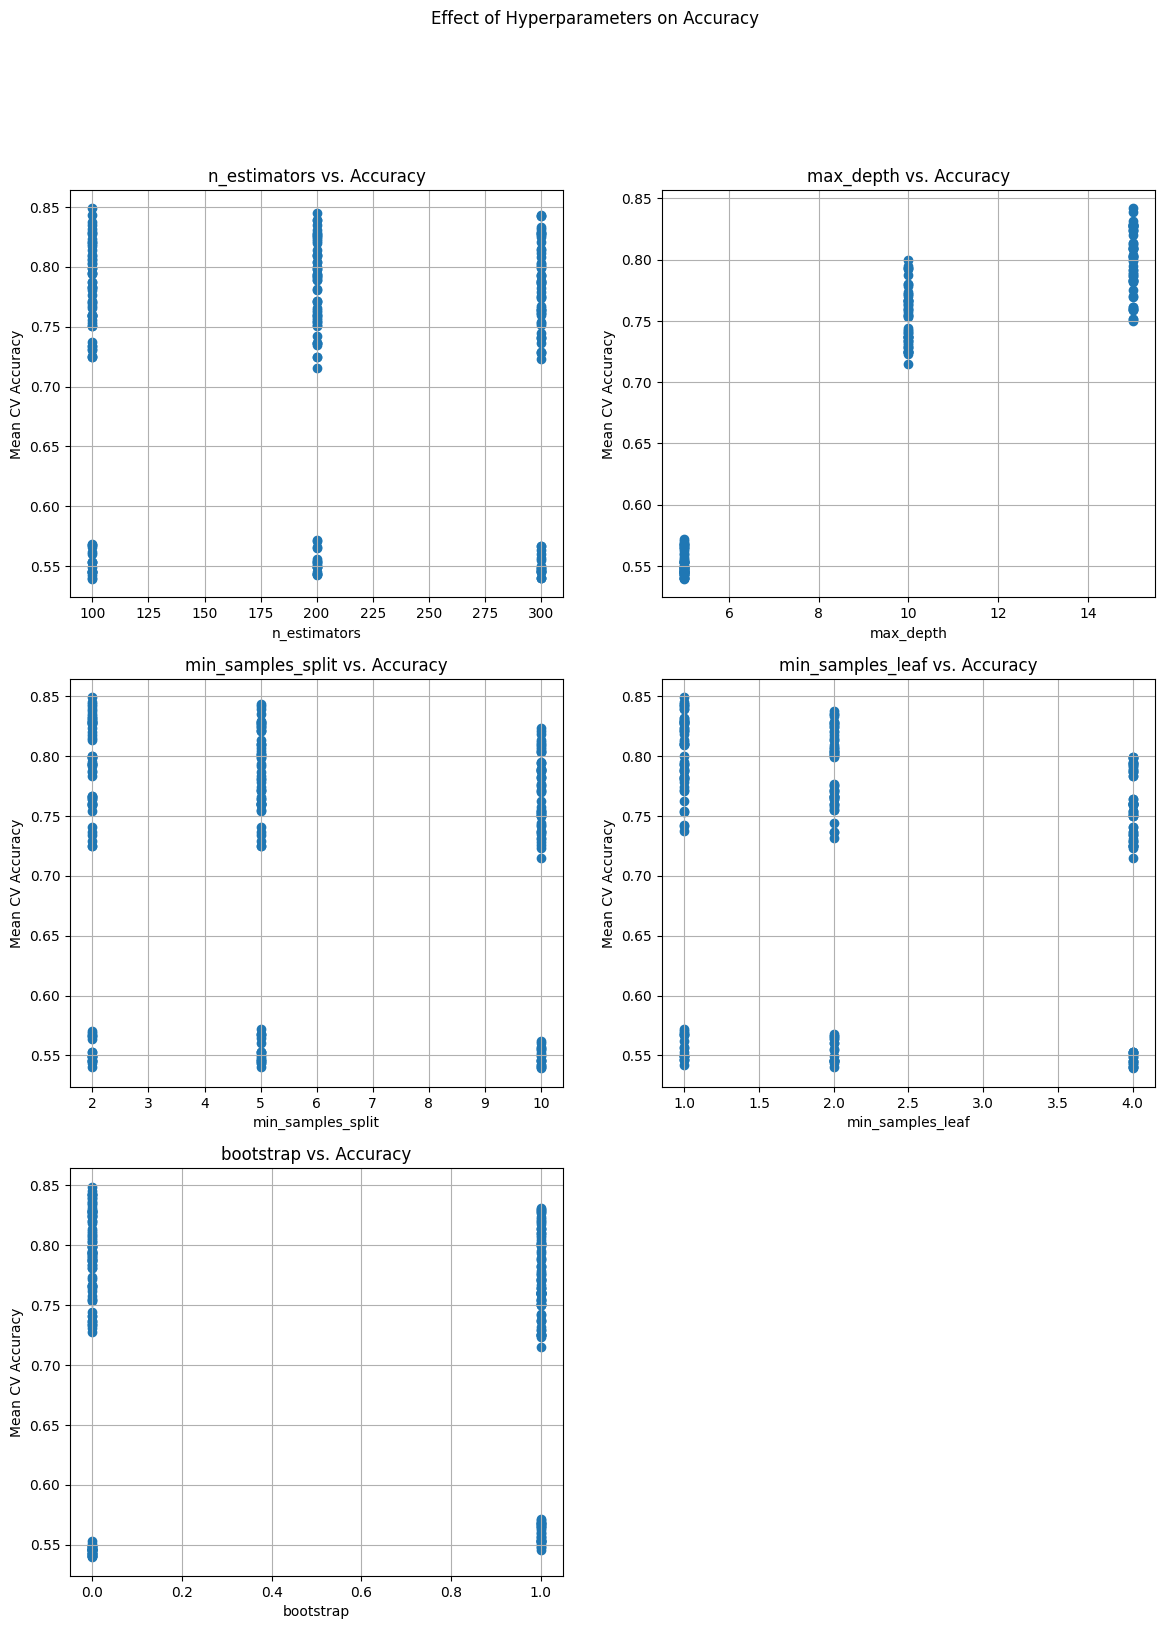

In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt

# Separate features and target variable from the training dataset
X_train = X
y_train = y

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [5, 10, 15, None],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}

# Define and train the random forest model using GridSearchCV
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters found
best_params = grid_search.best_params_

# Create a new random forest model with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

# Train the model with the entire training set
best_rf_model.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", best_params)

# Print training score
print("Training Score:", best_rf_model.score(X_train, y_train))

# Make predictions on the validation set
y_pred = best_rf_model.predict(X_train)

# Print classification report
report = classification_report(y_train, y_pred)
print("Classification Report:\n", report)

# Calculate and print accuracy, precision, recall, F1-score, sensitivity, specificity
accuracy = accuracy_score(y_train, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)
print(f"\nConfusion Matrix:\n{conf_matrix}")





# Prepare the test set for final prediction (without 'id' column)
X_test_final = X_test_selected_df.drop(columns=['id'])
final_predictions = best_rf_model.predict(X_test_final)

# Define the mapping for 'completion_status'
completion_status_mapping = {
    0: 'Default',
    1: 'Paid in full',
    2: 'Paid off with renewal',
    3: 'Paid via discounted payoff'
}

# Convert numeric predictions to categorical labels
mapped_predictions = [completion_status_mapping[pred] for pred in final_predictions]

# Create submission DataFrame
submission = pd.DataFrame({'id': X_test_selected_df['id'], 'completion_status': mapped_predictions})

# Save submission DataFrame to CSV
submission.to_csv('submission_RandomForestClassifier_tuned(Grid Search).csv', index=False)

# Display success message
print("\nSubmission file saved successfully.")

# Extract the results for plotting
results = grid_search.cv_results_
params = results['params']
mean_scores = results['mean_test_score']

# Extract hyperparameter values
n_estimators = [param['n_estimators'] for param in params]
max_depth = [param['max_depth'] for param in params]
min_samples_split = [param['min_samples_split'] for param in params]
min_samples_leaf = [param['min_samples_leaf'] for param in params]
bootstrap = [param['bootstrap'] for param in params]

# Create subplots to show the effect of each hyperparameter on the accuracy
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
fig.suptitle('Effect of Hyperparameters on Accuracy')

# Plot the effect of n_estimators
axes[0, 0].scatter(n_estimators, mean_scores)
axes[0, 0].set_xlabel('n_estimators')
axes[0, 0].set_ylabel('Mean CV Accuracy')
axes[0, 0].set_title('n_estimators vs. Accuracy')
axes[0, 0].grid(True)

# Plot the effect of max_depth
axes[0, 1].scatter(max_depth, mean_scores)
axes[0, 1].set_xlabel('max_depth')
axes[0, 1].set_ylabel('Mean CV Accuracy')
axes[0, 1].set_title('max_depth vs. Accuracy')
axes[0, 1].grid(True)

# Plot the effect of min_samples_split
axes[1, 0].scatter(min_samples_split, mean_scores)
axes[1, 0].set_xlabel('min_samples_split')
axes[1, 0].set_ylabel('Mean CV Accuracy')
axes[1, 0].set_title('min_samples_split vs. Accuracy')
axes[1, 0].grid(True)

# Plot the effect of min_samples_leaf
axes[1, 1].scatter(min_samples_leaf, mean_scores)
axes[1, 1].set_xlabel('min_samples_leaf')
axes[1, 1].set_ylabel('Mean CV Accuracy')
axes[1, 1].set_title('min_samples_leaf vs. Accuracy')
axes[1, 1].grid(True)

# Plot the effect of bootstrap
axes[2, 0].scatter(bootstrap, mean_scores)
axes[2, 0].set_xlabel('bootstrap')
axes[2, 0].set_ylabel('Mean CV Accuracy')
axes[2, 0].set_title('bootstrap vs. Accuracy')
axes[2, 0].grid(True)

# Remove the empty subplot (bottom-right corner)
fig.delaxes(axes[2, 1])

plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Separate features and target variable from the training dataset
X_train = X
y_train = y

# Define hyperparameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],    # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7],               # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]         # Minimum number of samples required at each leaf node
}

# Define and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters found
best_params = grid_search.best_params_

# Create a new Gradient Boosting model with the best parameters
best_gb_model = GradientBoostingClassifier(**best_params, random_state=42)

# Train the model with the entire training set
best_gb_model.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", best_params)

# Print training score
print("Training Score:", best_gb_model.score(X_train, y_train))

# Make predictions on the validation set
y_pred = best_gb_model.predict(X_train)

# Print classification report
report = classification_report(y_train, y_pred)
print("Classification Report:\n", report)

# Calculate and print accuracy, precision, recall, F1-score, sensitivity, specificity
accuracy = accuracy_score(y_train, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)
print(f"\nConfusion Matrix:\n{conf_matrix}")


# Prepare the test set for final prediction (without 'id' column)
X_test_final = X_test_selected_df.drop(columns=['id'])
final_predictions = best_gb_model.predict(X_test_final)

# Define the mapping for 'completion_status'
completion_status_mapping = {
    0: 'Default',
    1: 'Paid in full',
    2: 'Paid off with renewal',
    3: 'Paid via discounted payoff'
}

# Convert numeric predictions to categorical labels
mapped_predictions = [completion_status_mapping[pred] for pred in final_predictions]

# Create submission DataFrame
submission = pd.DataFrame({'id': X_test_selected_df['id'], 'completion_status': mapped_predictions})

# Save submission DataFrame to CSV
submission.to_csv('submission_GradientBoostingClassifier_tuned(Grid Search).csv', index=False)

# Display success message
print("\nSubmission file saved successfully.")

# Extract the results for plotting
results = grid_search.cv_results_
params = results['params']
mean_scores = results['mean_test_score']

# Extract hyperparameter values
n_estimators = [param['n_estimators'] for param in params]
learning_rate = [param['learning_rate'] for param in params]
max_depth = [param['max_depth'] for param in params]
min_samples_split = [param['min_samples_split'] for param in params]
min_samples_leaf = [param['min_samples_leaf'] for param in params]

# Create subplots to show the effect of each hyperparameter on the accuracy
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
fig.suptitle('Effect of Hyperparameters on Accuracy')

# Plot the effect of n_estimators
axes[0, 0].scatter(n_estimators, mean_scores)
axes[0, 0].set_xlabel('n_estimators')
axes[0, 0].set_ylabel('Mean CV Accuracy')
axes[0, 0].set_title('n_estimators vs. Accuracy')
axes[0, 0].grid(True)

# Plot the effect of learning_rate
axes[0, 1].scatter(learning_rate, mean_scores)
axes[0, 1].set_xlabel('learning_rate')
axes[0, 1].set_ylabel('Mean CV Accuracy')
axes[0, 1].set_title('learning_rate vs. Accuracy')
axes[0, 1].grid(True)

# Plot the effect of max_depth
axes[1, 0].scatter(max_depth, mean_scores)
axes[1, 0].set_xlabel('max_depth')
axes[1, 0].set_ylabel('Mean CV Accuracy')
axes[1, 0].set_title('max_depth vs. Accuracy')
axes[1, 0].grid(True)

# Plot the effect of min_samples_split
axes[1, 1].scatter(min_samples_split, mean_scores)
axes[1, 1].set_xlabel('min_samples_split')
axes[1, 1].set_ylabel('Mean CV Accuracy')
axes[1, 1].set_title('min_samples_split vs. Accuracy')
axes[1, 1].grid(True)

# Plot the effect of min_samples_leaf
axes[2, 0].scatter(min_samples_leaf, mean_scores)
axes[2, 0].set_xlabel('min_samples_leaf')
axes[2, 0].set_ylabel('Mean CV Accuracy')
axes[2, 0].set_title('min_samples_leaf vs. Accuracy')
axes[2, 0].grid(True)

# Remove the empty subplot (bottom-right corner)
fig.delaxes(axes[2, 1])

plt.show()


Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Training Score: 0.8546341463414634
Validation Score: 0.8390243902439024
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80        46
           1       0.80      0.97      0.87       101
           2       0.94      0.67      0.78        48
           3       1.00      0.70      0.82        10

    accuracy                           0.84       205
   macro avg       0.90      0.77      0.82       205
weighted avg       0.85      0.84      0.83       205


Accuracy: 0.8390

Confusion Matrix:
[[35 10  1  0]
 [ 2 98  1  0]
 [ 4 12 32  0]
 [ 0  3  0  7]]

Submission file saved successfully.


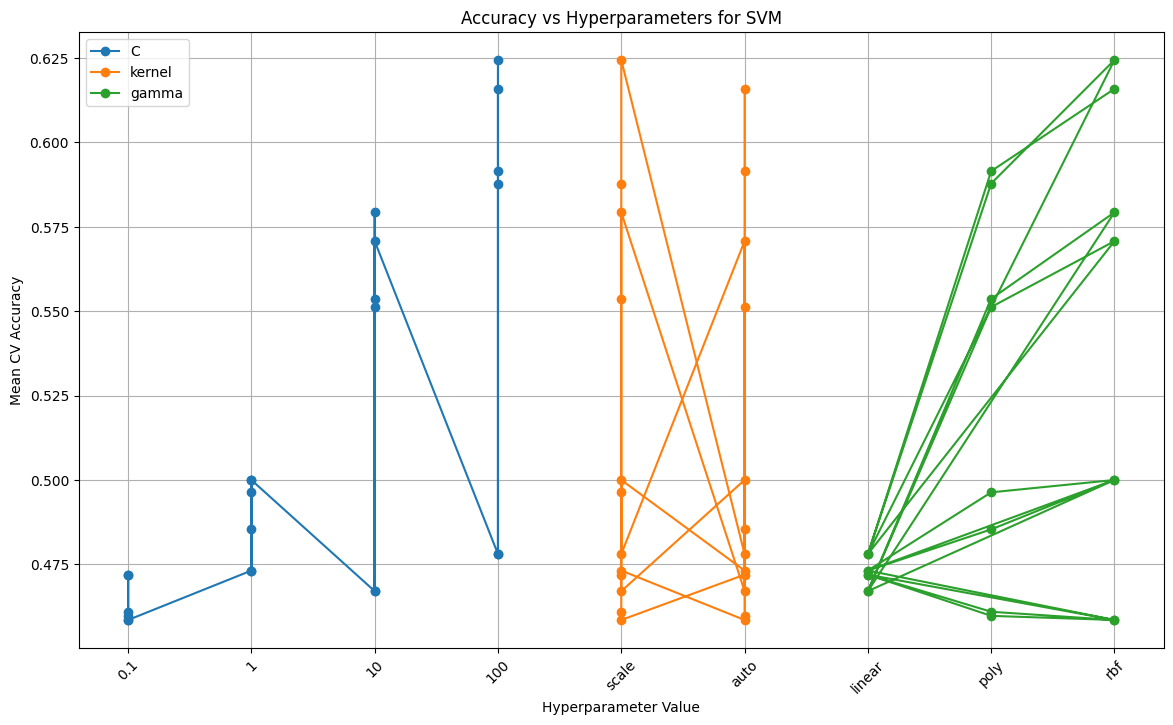

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt

# Assuming 'train' and 'test' datasets are already loaded

# Separate features and target variable from the training dataset
X_train = X
y_train = y

# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],            # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf'], # Kernel type to be used in the algorithm
    'gamma': ['scale', 'auto']         # Kernel coefficient
}

# Define and train the SVM model using GridSearchCV
svm_model = SVC(random_state=42)
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_split, y_train_split)

# Get the best parameters found
best_params = grid_search.best_params_

# Create a new SVM model with the best parameters
best_svm_model = SVC(**best_params, random_state=42)

# Train the model with the entire training set
best_svm_model.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", best_params)

# Print training and validation scores
print("Training Score:", best_svm_model.score(X_train, y_train))
print("Validation Score:", best_svm_model.score(X_val_split, y_val_split))

# Make predictions on the validation set
y_pred = best_svm_model.predict(X_val_split)

# Print classification report
report = classification_report(y_val_split, y_pred)
print("Classification Report:\n", report)

# Calculate and print accuracy, precision, recall, F1-score, sensitivity, specificity
accuracy = accuracy_score(y_val_split, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_val_split, y_pred)
print(f"\nConfusion Matrix:\n{conf_matrix}")



# Prepare the test set for final prediction (without 'id' column)
X_test_final = X_test_selected_df.drop(columns=['id'])
final_predictions = best_svm_model.predict(X_test_final)

# Define the mapping for 'completion_status'
completion_status_mapping = {
    0: 'Default',
    1: 'Paid in full',
    2: 'Paid off with renewal',
    3: 'Paid via discounted payoff'
}

# Convert numeric predictions to categorical labels
mapped_predictions = [completion_status_mapping[pred] for pred in final_predictions]

# Create submission DataFrame
submission = pd.DataFrame({'id': X_test_selected_df['id'], 'completion_status': mapped_predictions})

# Save submission DataFrame to CSV
submission.to_csv('submission_SVM_tuned(Grid Search).csv', index=False)

# Display success message
print("\nSubmission file saved successfully.")

# Extract the results for plotting
results = grid_search.cv_results_
params = results['params']
param_names = list(param_grid.keys())
param_values = [list(p.values()) for p in params]

# Extract scores for plotting
mean_scores = results['mean_test_score']

# Plotting accuracy while varying hyperparameters
plt.figure(figsize=(14, 8))

for param_name, param_value in zip(param_names, np.transpose(param_values)):
    plt.plot(param_value, mean_scores, marker='o', label=param_name)

plt.xlabel('Hyperparameter Value')
plt.ylabel('Mean CV Accuracy')
plt.title('Accuracy vs Hyperparameters for SVM')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [ ]:
# ################################################ TUNING RF GA #############
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, accuracy_score
# from deap import base, creator, tools, algorithms
# import random

# # Separate features and target variable from the training dataset
# X_train = train.drop(columns=['completion_status'])
# y_train = train['completion_status']
# X_test_final = test.drop(columns=['id'])

# # Define the hyperparameter space
# param_space = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # Create an individual representation and the fitness function
# def evaluate(individual):
#     params = {
#         'n_estimators': param_space['n_estimators'][individual[0]],
#         'max_depth': param_space['max_depth'][individual[1]],
#         'min_samples_split': param_space['min_samples_split'][individual[2]],
#         'min_samples_leaf': param_space['min_samples_leaf'][individual[3]],
#         'bootstrap': param_space['bootstrap'][individual[4]]
#     }
#     model = RandomForestClassifier(**params)
#     model.fit(X_train, y_train)
#     predictions = model.predict(X_train)
#     return accuracy_score(y_train, predictions),

# creator.create("FitnessMax", base.Fitness, weights=(1.0,))
# creator.create("Individual", list, fitness=creator.FitnessMax)

# toolbox = base.Toolbox()
# toolbox.register("attr_int", random.randint, 0, 2)
# toolbox.register("attr_bool", random.randint, 0, 1)

# toolbox.register("individual", tools.initCycle, creator.Individual,
#                  (toolbox.attr_int, toolbox.attr_int, toolbox.attr_int, toolbox.attr_int, toolbox.attr_bool), n=1)
# toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# toolbox.register("mate", tools.cxTwoPoint)
# toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
# toolbox.register("select", tools.selTournament, tournsize=3)
# toolbox.register("evaluate", evaluate)

# # Genetic Algorithm parameters
# population_size = 50
# num_generations = 10
# crossover_prob = 0.7
# mutation_prob = 0.2

# # Initialize population
# population = toolbox.population(n=population_size)

# # Run genetic algorithm
# algorithms.eaSimple(population, toolbox, cxpb=crossover_prob, mutpb=mutation_prob,
#                     ngen=num_generations, stats=None, halloffame=None, verbose=True)

# # Select the best individual
# best_individual = tools.selBest(population, k=1)[0]
# best_params = {
#     'n_estimators': param_space['n_estimators'][best_individual[0]],
#     'max_depth': param_space['max_depth'][best_individual[1]],
#     'min_samples_split': param_space['min_samples_split'][best_individual[2]],
#     'min_samples_leaf': param_space['min_samples_leaf'][best_individual[3]],
#     'bootstrap': param_space['bootstrap'][best_individual[4]]
# }

# # Train the best model with the entire training set
# best_rf_model = RandomForestClassifier(**best_params)
# best_rf_model.fit(X_train, y_train)

# # Print best parameters
# print("Best Parameters:", best_params)

# # Print training score
# print("Training Score:", best_rf_model.score(X_train, y_train))

# # Make final predictions
# final_predictions = best_rf_model.predict(X_test_final)

# # Define the mapping for 'completion_status'
# completion_status_mapping = {
#     0: 'Default',
#     1: 'Paid in full',
#     2: 'Paid off with renewal',
#     3: 'Paid via discounted payoff'
# }

# # Convert numeric predictions to categorical labels
# mapped_predictions = [completion_status_mapping[pred] for pred in final_predictions]

# # Create submission DataFrame
# submission = pd.DataFrame({'id': test['id'], 'completion_status': mapped_predictions})

# # Save submission DataFrame to CSV
# submission.to_csv('submission_RandomForestClassifier_tuned.csv', index=False)

# # Display success message
# print("Submission file saved successfully.")


In [ ]:
# ################################################ TUNING RF RANDOM SEARCH #############
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report
# from sklearn.model_selection import RandomizedSearchCV

# # Separate features and target variable from the training dataset
# X_train = train.drop(columns=['completion_status'])
# y_train = train['completion_status']

# # Define hyperparameter grid
# param_distributions = {
#     'n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'max_depth': [10, 20, 30, None],   # Maximum depth of the trees
#     'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
#     'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required at each leaf node
#     'bootstrap': [True, False]         # Whether bootstrap samples are used when building trees
# }

# # Initialize random forest classifier
# rf_model = RandomForestClassifier()

# # Initialize random search with cross-validation
# random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions, n_iter=100, cv=5, n_jobs=-1, random_state=42)

# # Perform random search
# random_search.fit(X_train, y_train)

# # Get the best parameters found
# best_params = random_search.best_params_

# # Create a new random forest model with the best parameters
# best_rf_model = RandomForestClassifier(**best_params)

# # Train the model with the entire training set
# best_rf_model.fit(X_train, y_train)

# # Print best parameters
# print("Best Parameters:", best_params)

# # Print training score
# print("Training Score:", best_rf_model.score(X_train, y_train))

# # Make final predictions
# X_test_final = test.drop(columns=['id'])
# final_predictions = best_rf_model.predict(X_test_final)


# # Define the mapping for 'completion_status'
# completion_status_mapping = {
#     0: 'Default',
#     1: 'Paid in full',
#     2: 'Paid off with renewal',
#     3: 'Paid via discounted payoff'
# }

# # Convert numeric predictions to categorical labels
# mapped_predictions = [completion_status_mapping[pred] for pred in final_predictions]

# # Create submission DataFrame
# submission = pd.DataFrame({'id': test['id'], 'completion_status': mapped_predictions})

# # Save submission DataFrame to CSV
# submission.to_csv('submission_RandomForestClassifier_tuned(Random Search).csv', index=False)

# # Display success message
# print("Submission file saved successfully.")
